In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import json

import sys

sys.path.append("../../")

##################################################################
os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,2,3,4,5,6,7"
##################################################################

import logging
from src.utils import logging_utils
from src.utils import env_utils

logger = logging.getLogger(__name__)

logging.basicConfig(
    level=logging.DEBUG,
    format=logging_utils.DEFAULT_FORMAT,
    datefmt=logging_utils.DEFAULT_DATEFMT,
    stream=sys.stdout,
)

import torch
import transformers

logger.info(f"{torch.__version__=}, {torch.version.cuda=}")
logger.info(
    f"{torch.cuda.is_available()=}, {torch.cuda.device_count()=}, {torch.cuda.get_device_name()=}"
)
logger.info(f"{transformers.__version__=}")

2025-10-29 17:10:39 __main__ INFO     torch.__version__='2.7.0+cu126', torch.version.cuda='12.6'
2025-10-29 17:10:39 __main__ INFO     torch.cuda.is_available()=True, torch.cuda.device_count()=8, torch.cuda.get_device_name()='NVIDIA A100 80GB PCIe'
2025-10-29 17:10:39 __main__ INFO     transformers.__version__='4.55.3'


In [8]:
from src.utils.training_utils import get_device_map

# model_key = "meta-llama/Llama-2-70b-hf"

# model_key = "meta-llama/Llama-3.2-3B"
# model_key = "meta-llama/Llama-3.1-8B"
# model_key = "meta-llama/Llama-3.1-70B-Instruct"
# model_key = "meta-llama/Llama-3.3-70B-Instruct"
# model_key = "meta-llama/Llama-3.1-405B-Instruct"

# model_key = "google/gemma-2-9b-it"
# model_key = "google/gemma-3-12b-it"
model_key = "google/gemma-2-27b-it"

# model_key = "deepseek-ai/DeepSeek-R1-Distill-Llama-8B"

# model_key = "allenai/OLMo-2-1124-7B-Instruct"
# model_key = "allenai/OLMo-7B-0424-hf"

# model_key = "Qwen/Qwen2-7B"
# model_key = "Qwen/Qwen2.5-14B-Instruct"
# model_key = "Qwen/Qwen2.5-32B-Instruct"
# model_key = "Qwen/Qwen2.5-72B-Instruct"

# model_key = "Qwen/Qwen3-1.7B"
# model_key = "Qwen/Qwen3-4B"
# model_key = "Qwen/Qwen3-8B"
# model_key = "Qwen/Qwen3-14B"
# model_key = "Qwen/Qwen3-32B"

# device_map = get_device_map(model_key, 30, n_gpus=8)
# device_map

In [4]:
from src.models import ModelandTokenizer

# from transformers import BitsAndBytesConfig

mt = ModelandTokenizer(
    model_key=model_key,
    torch_dtype=torch.bfloat16,
    # device_map=device_map,
    device_map="auto",
    # quantization_config = BitsAndBytesConfig(
    #     # load_in_4bit=True
    #     load_in_8bit=True
    # )
    attn_implementation="eager",
)

2025-10-26 18:11:38 src.models WARNING  meta-llama/Llama-3.3-70B-Instruct not found in /disk/u/arnab/Codes/Models
If not found in cache, model will be downloaded from HuggingFace to cache directory
2025-10-26 18:11:38 urllib3.connectionpool DEBUG    Starting new HTTPS connection (1): huggingface.co:443


2025-10-26 18:11:38 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/config.json HTTP/1.1" 200 0
2025-10-26 18:11:38 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/tokenizer_config.json HTTP/1.1" 200 0
2025-10-26 18:11:38 urllib3.connectionpool DEBUG    https://huggingface.co:443 "GET /api/models/meta-llama/Llama-3.3-70B-Instruct/tree/main/additional_chat_templates?recursive=False&expand=False HTTP/1.1" 404 64


Loading checkpoint shards:   0%|          | 0/30 [00:00<?, ?it/s]

2025-10-26 18:12:21 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/generation_config.json HTTP/1.1" 200 0
2025-10-26 18:12:21 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/custom_generate/generate.py HTTP/1.1" 404 0
2025-10-26 18:12:22 src.models INFO     loaded model <meta-llama/Llama-3.3-70B-Instruct> | size: 134570.516 MB | dtype: torch.bfloat16 | device: cuda:0


In [5]:
from src.selection.data import CounterFactualSamplePair
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(model_key, use_fast=True)

with open("/disk/u/arnab/Codes/Projects/retrieval/results/selection/optimized_heads_gold/Llama-3.3-70B-Instruct/distinct_options/select_first/legacy/samples/train/sample_00016.json") as f:
    cf_pair_data = json.load(f)

cf_pair = CounterFactualSamplePair.from_dict(cf_pair_data)
source_sample = cf_pair.patch_sample
destination_sample = cf_pair.clean_sample

print("Source Sample: ", source_sample.prompt(), ">>", tokenizer.decode(source_sample.ans_token_id))
print("Destination Sample: ", destination_sample.prompt(), ">>", tokenizer.decode(destination_sample.ans_token_id))
print(f"{destination_sample.metadata['track_type_obj']} | {tokenizer.decode(destination_sample.metadata['track_type_obj_token_id'])}")


2025-10-26 18:12:23 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/tokenizer_config.json HTTP/1.1" 200 0
2025-10-26 18:12:23 urllib3.connectionpool DEBUG    https://huggingface.co:443 "GET /api/models/meta-llama/Llama-3.3-70B-Instruct/tree/main/additional_chat_templates?recursive=False&expand=False HTTP/1.1" 404 64


Source Sample:  Options: Palm, Spruce, Bathtub, Saxophone, Drum.
What is the first tree from the list above?
Answer: >>  Palm
Destination Sample:  Options: Accordion, Toothpaste, Harp, Hickory, Maple.
What is the first music instrument from the list above?
Answer: >>  Acc
Hickory |  Hick


In [6]:
from src.selection.data import SelectOneTask, CountingTask

#################################################################################
TASK_CLS = SelectOneTask
prompt_template_idx = 3
# TASK_CLS = CountingTask
# prompt_template_idx = 1
N_DISTRACTORS = 5
OPTION_STYLE = "single_line"
#################################################################################

select_task = TASK_CLS.load(
    path=os.path.join(
        env_utils.DEFAULT_DATA_DIR, 
        "selection", 
        # "profession.json"
        # "nationality.json"
        "objects.json"
    )
)

print(select_task)

['name', 'prompt_templates', 'odd_one_prompt_templates', 'order_prompt_templates', 'count_prompt_templates', 'yes_no_prompt_templates', 'first_item_in_cat_prompt_templates', 'last_item_in_cat_prompt_templates', 'categories', 'exclude_categories']
SelectOneTask: (different objects)
Categories: fruit(15), vehicle(15), furniture(15), animal(15), music instrument(15), clothing(15), electronics(14), sport equipment(15), kitchen appliance(15), vegetable(14), building(15), office supply(15), bathroom item(15), flower(15), tree(15), jewelry(15)



In [7]:
from src.selection.data import get_counterfactual_samples_within_task

source_sample, destination_sample = get_counterfactual_samples_within_task(
    mt=mt,
    task = select_task,
    patch_category="fruit",
    n_distractors=5,
    mcqify=True,
    filter_by_lm_prediction=True,
)

print("Source Sample: ", source_sample.prompt(), ">>", mt.tokenizer.decode(source_sample.ans_token_id))
print("Destination Sample: ", destination_sample.prompt(), ">>", mt.tokenizer.decode(destination_sample.ans_token_id))
print(f"{destination_sample.metadata['track_type_obj']} | {mt.tokenizer.decode(destination_sample.metadata['track_type_obj_token_id'])}")

2025-10-26 18:12:25 src.selection.data INFO     clean_obj_idx=2 | ['Television', 'Kiwi', 'Skis', 'Ruler', 'Submarine', 'Temple']


type(task)=<class 'src.selection.data.SelectOneTask'>
2025-10-26 18:12:26 src.selection.data INFO     a. Razor
b. Socks
c. Saxophone
d. Raspberry
e. Notebook
f. Basketball
Which among these objects mentioned above is a fruit?
Answer:
2025-10-26 18:12:26 src.selection.data INFO     Plum | fruit -> Raspberry | pred=['" d"[294] (p=0.691, logit=21.625)', '" ("[320] (p=0.175, logit=20.250)', '" Raspberry"[48665] (p=0.044, logit=18.875)', '" The"[578] (p=0.027, logit=18.375)', '" Option"[7104] (p=0.016, logit=17.875)']
2025-10-26 18:12:26 src.selection.data INFO     p. Television
q. Kiwi
r. Skis
s. Ruler
t. Submarine
u. Temple
Which among these objects mentioned above is a sport equipment?
Answer:
2025-10-26 18:12:26 src.selection.data INFO     Dumbbell | sport equipment -> Skis | pred=['" r"[436] (p=0.570, logit=19.750)', '" Option"[7104] (p=0.238, logit=18.875)', '" ("[320] (p=0.060, logit=17.500)', '" option"[3072] (p=0.032, logit=16.875)', '" Sk"[4923] (p=0.015, logit=16.125)']
2025-10-2

In [8]:
import copy, random
from src.selection.data import KeyedSet

category_wise_examples = {}
for cat in select_task.category_wise_examples:
    examples = copy.deepcopy(select_task.category_wise_examples[cat])
    random.shuffle(examples)
    category_wise_examples[cat] = KeyedSet(examples, tokenizer=mt.tokenizer)

category_wise_examples["fruit"].values

['Strawberry',
 'Orange',
 'Plum',
 'Kiwi',
 'Blueberry',
 'Grape',
 'Banana',
 'Cherry',
 'Pear',
 'Peach',
 'Raspberry',
 'Apple',
 'Watermelon',
 'Mango',
 'Pineapple']

In [9]:
[mt.tokenizer.decode(t) for t in mt.tokenizer(" apple", return_tensors="pt", add_special_tokens=False).input_ids[0]]

[' apple']

In [10]:
from src.selection.utils import get_first_token_id

tok = get_first_token_id(name="apple", tokenizer=mt.tokenizer)
mt.tokenizer.decode([tok])

' apple'

In [11]:
sample = select_task.get_random_sample(
    mt = mt,
    option_style=OPTION_STYLE,
    prompt_template_idx=prompt_template_idx,
    # category="actor",
    # category="Brazil"
    category="fruit",
    filter_by_lm_prediction=False,
)

print(sample.prompt(), ">>", f'"{mt.tokenizer.decode([sample.ans_token_id])}"')

fruit >> ['Apple', 'Pear', 'Watermelon', 'Cherry', 'Grape', 'Raspberry', 'Kiwi', 'Plum', 'Orange', 'Pineapple', 'Mango', 'Blueberry', 'Strawberry', 'Peach', 'Banana']
Options: Banana, Motorcycle, Watch, Hairdryer, Pressure cooker, Towel.
Which among these objects mentioned above is a fruit?
Answer: >> " Banana"


In [12]:
select_task.task_name

'select_one'

## Loading the heads

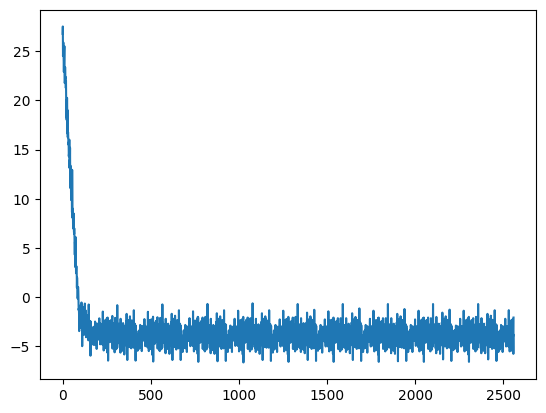

In [9]:
from matplotlib import pyplot as plt
import numpy as np

# optimized_path = os.path.join(
#     env_utils.DEFAULT_RESULTS_DIR,
#     "selection/optimized_backup_heads",
#     mt.name.split("/")[-1],
#     f"{select_task.task_name}.npz"
# )

optimized_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "selection/optimized_heads",
    model_key.split("/")[-1],
    "distinct_options",
    # f"{select_task.task_name}",
    "select_one",
    # "legacy",
    "epoch_10.npz"
)

# optimized_path = os.path.join(
#     env_utils.DEFAULT_RESULTS_DIR,
#     "test_opt_code",
#     model_key.split("/")[-1],
#     "distinct_options",
#     f"{select_task.task_name}",
#     "legacy",
#     "epoch_10.npz"
# )

# optimized_path = os.path.join(
#     env_utils.DEFAULT_RESULTS_DIR,
#     "selection/test_localization_gold",
#     mt.name.split("/")[-1],
#     f"{TASK_CLS.task_name}",
#     "legacy",
#     "epoch_10.npz",
# )

# optimized_path = os.path.join(
#     env_utils.DEFAULT_RESULTS_DIR,
#     "selection/optimized_heads_gold",
#     model_key.split("/")[-1],
#     "distinct_options",
#     f"{select_task.task_name}_mcq",
#     "legacy",
#     "epoch_10.npz"
# )


# optimized_path = os.path.join(
#     env_utils.DEFAULT_RESULTS_DIR,
#     "selection/ov_contribution",
#     model_key.split("/")[-1],
#     "distinct_options",
#     f"{select_task.task_name}_mcq",
#     "legacy",
#     "epoch_10.npz"
# )

optimization_results = np.load(optimized_path, allow_pickle=True)
plt.plot(optimization_results["losses"])
plt.show()

79


(True, True)

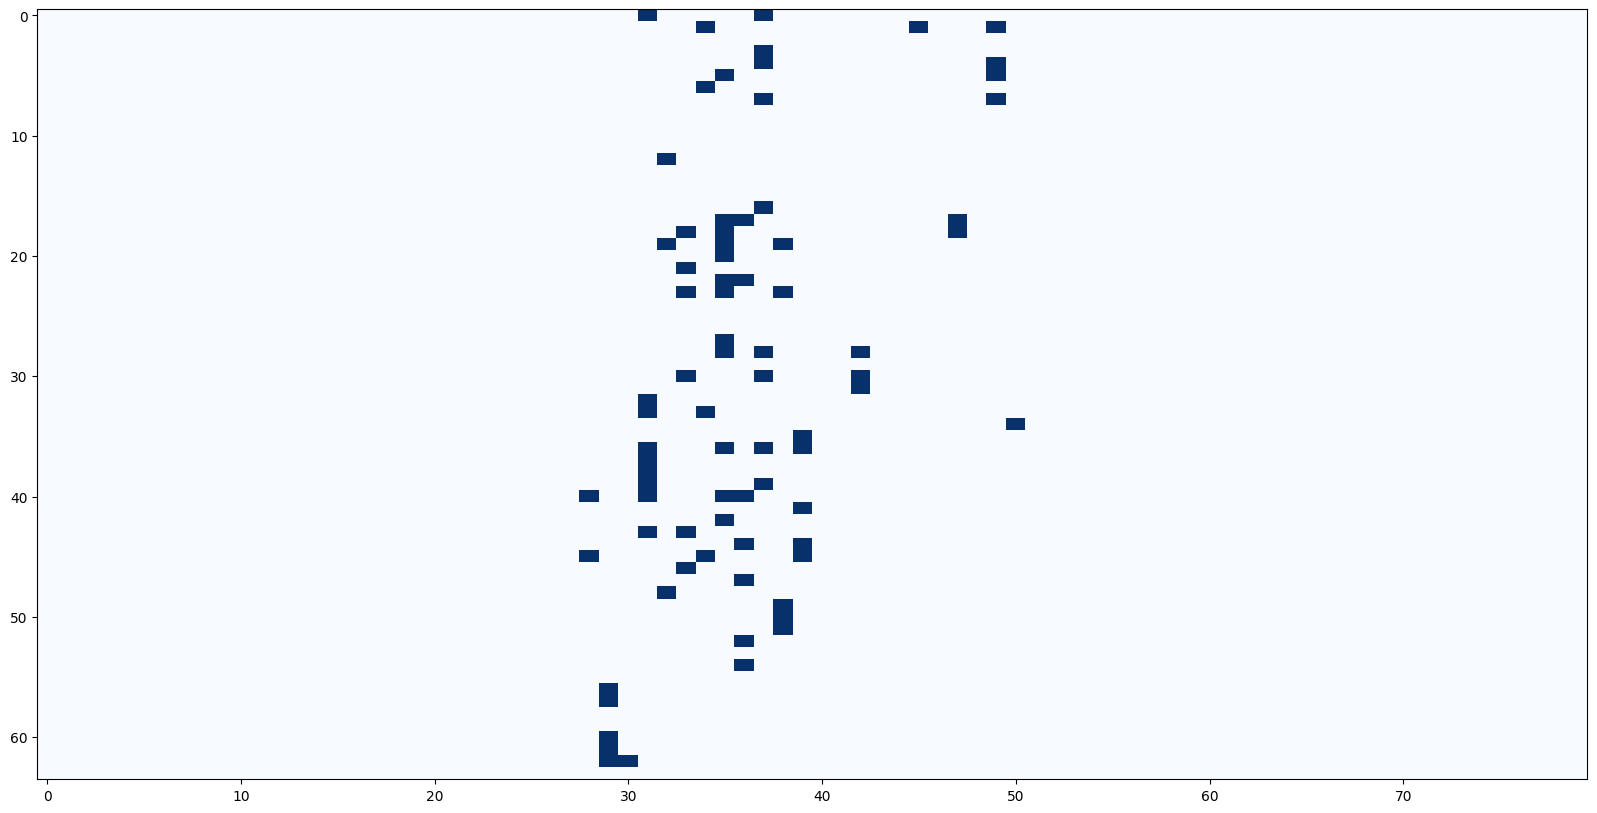

In [ ]:
plt.figure(figsize=(20, 10))

optimal_head_mask = torch.tensor(optimization_results["optimal_mask"]).to(torch.float32)
if model_key == "meta-llama/Llama-3.3-70B-Instruct":
    optimal_head_mask[52:, :] = 0.0
if model_key.startswith("google/gemma-2-27b-it"):
    optimal_head_mask[40:, :] = 0.0
plt.imshow(
    optimal_head_mask.T.numpy(),
    cmap="Blues",
    aspect="auto",
    vmin=0,
    vmax=1,
)

optimized_heads = torch.nonzero(optimal_head_mask > 0.5, as_tuple=False).tolist()
optimized_heads = [
    (layer_idx, head_idx) for layer_idx, head_idx in optimized_heads
]
print(len(optimized_heads))

HEADS = optimized_heads

(35, 19) in HEADS, (35, 19) in optimized_heads
# [(29, 3) in HEADS]

In [7]:
print(HEADS)

[(28, 40), (28, 45), (29, 56), (29, 57), (29, 60), (29, 61), (29, 62), (30, 62), (31, 0), (31, 32), (31, 33), (31, 36), (31, 37), (31, 38), (31, 39), (31, 40), (31, 43), (32, 12), (32, 19), (32, 48), (33, 18), (33, 21), (33, 23), (33, 30), (33, 43), (33, 46), (34, 1), (34, 6), (34, 33), (34, 45), (35, 5), (35, 17), (35, 18), (35, 19), (35, 20), (35, 22), (35, 23), (35, 27), (35, 28), (35, 36), (35, 40), (35, 42), (36, 17), (36, 22), (36, 40), (36, 44), (36, 47), (36, 52), (36, 54), (37, 0), (37, 3), (37, 4), (37, 7), (37, 16), (37, 28), (37, 30), (37, 36), (37, 39), (38, 19), (38, 23), (38, 49), (38, 50), (38, 51), (39, 35), (39, 36), (39, 41), (39, 44), (39, 45), (42, 28), (42, 30), (42, 31), (45, 1), (47, 17), (47, 18), (49, 1), (49, 4), (49, 5), (49, 7), (50, 34)]


In [44]:
from src.attention import get_attention_matrices
from src.selection.functional import (
    verify_head_patterns,
    get_patches_to_verify_independent_enrichment,
)

attn_pattern = verify_head_patterns(
    prompt=sample.prompt(option_style="single_line"),
    options=sample.options,
    mt=mt,
    heads=optimized_heads,
    # heads = HEADS,
    # heads = [(35, 19)],
    start_from=1
)

2025-10-26 19:21:38 src.selection.functional DEBUG    Predictions: ['" Banana"[76924] (p=0.723, logit=21.625)', '" The"[578] (p=0.126, logit=19.875)', '" Among"[22395] (p=0.052, logit=19.000)', '" A"[362] (p=0.052, logit=19.000)', '" B"[426] (p=0.008, logit=17.125)']
2025-10-26 19:21:38 src.selection.functional INFO     Combined attention matrix for all heads


# Validating Against Other Reduce Tasks

## SelectOne Task

In [45]:
from src.selection.data import SelectionSample, SelectOneTask

select_one_task = SelectOneTask.load(
    path=os.path.join(
        env_utils.DEFAULT_DATA_DIR, 
        "selection", 
        # "objects.json"
        "profession.json"
        # "nationality.json"
        # "landmarks.json"
        # "rhymes.json"
    )
)
print(select_one_task)
print(select_one_task.exclude_categories)

['name', 'prompt_templates', 'odd_one_prompt_templates', 'categories', 'exclude_categories']
SelectOneTask: (profession of a famous person)
Categories: actor(20), singer(20), comedian(20), director(20), basketball player(20), football player(20), soccer player(20), tennis player(20), golfer(20), boxer(20), news anchor(20), journalist(20), author(20), fashion designer(20), entrepreneur(19), politician(20)

{'actor': ['comedian', 'director'], 'comedian': ['actor'], 'director': ['actor'], 'journalist': ['news anchor', 'author'], 'news anchor': ['journalist', 'author'], 'author': ['journalist', 'news anchor'], 'entrepreneur': ['fashion designer', 'politician'], 'fashion designer': ['entrepreneur', 'politician'], 'politician': ['entrepreneur', 'fashion designer']}


In [46]:
test_sample = select_one_task.get_random_sample(
    mt = mt,
    option_style=OPTION_STYLE,
    prompt_template_idx=3,
    # category="fruit",
    # category="actor",
    # category="United Kingdom",
    filter_by_lm_prediction=True,
)
# test_sample.prompt_template = "Recall the nationality of these people:\n" + test_sample.prompt_template
# test_sample.prompt_template = "Recall which country these landmarks are located in:\n" + test_sample.prompt_template
print(test_sample.prompt(), ">>", f'"{mt.tokenizer.decode([test_sample.ans_token_id])}"')
test_sample.prediction

journalist >> ['Jeffrey Goldberg', 'Christiane Amanpour', 'Bari Weiss', 'Jim Acosta', 'Carl Bernstein', 'Bob Woodward', 'Maggie Haberman', 'Susan Glasser', 'David Remnick', 'Glenn Greenwald', 'Peter Baker', 'Jane Mayer', 'George Packer', 'Wesley Lowery', 'Anne Applebaum', 'Matt Taibbi', 'Ronan Farrow', 'Yamiche Alcindor', 'Kara Swisher', 'Ta-Nehisi Coates']
Options: Peter Baker, The Weeknd, Iga Świątek, Karl Lagerfeld, Vera Wang, Larry Ellison.
Who among these people mentioned above is a journalist by profession?
Answer: >> " Peter"


[PredictedToken(token=' Peter', prob=0.921875, logit=23.25, token_id=11291, metadata=None),
 PredictedToken(token=' The', prob=0.035888671875, logit=20.0, token_id=578, metadata=None),
 PredictedToken(token=' Among', prob=0.021728515625, logit=19.5, token_id=22395, metadata=None),
 PredictedToken(token=' (', prob=0.0062255859375, logit=18.25, token_id=320, metadata=None),
 PredictedToken(token=' Only', prob=0.0015716552734375, logit=16.875, token_id=8442, metadata=None)]

In [47]:
attn_pattern = verify_head_patterns(
    prompt=test_sample.prompt(),
    options=test_sample.options,
    mt=mt,
    heads=optimized_heads,
    # heads = HEADS,
    # heads = [(35, 19)],
    start_from=1
)

2025-10-26 19:21:50 src.selection.functional DEBUG    Predictions: ['" Peter"[11291] (p=0.922, logit=23.250)', '" The"[578] (p=0.036, logit=20.000)', '" Among"[22395] (p=0.022, logit=19.500)', '" ("[320] (p=0.006, logit=18.250)', '" Only"[8442] (p=0.002, logit=16.875)']
2025-10-26 19:21:50 src.selection.functional INFO     Combined attention matrix for all heads


In [21]:
from src.selection.data import CounterFactualSamplePair
from src.functional import free_gpu_cache
from src.selection.data import get_counterfactual_samples_interface
import random

validation_samples_save_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "selection",
    "samples",
    "validation",
    mt.name.split("/")[-1],
    select_one_task.task_name,
    "objects",
    # "profession",
    # "nationality",
    # "landmarks"
    # "rhymes"
)

os.makedirs(validation_samples_save_path, exist_ok=True)


free_gpu_cache()
validation_set = []
validation_limit = 474
start_from = 550

counterfactual_sampler = get_counterfactual_samples_interface[select_one_task.task_name]

while len(validation_set) < validation_limit:
    print(f"sample {len(validation_set)+1} / {validation_limit}")
    patch, clean = counterfactual_sampler(
        mt=mt,
        task=select_one_task,
        filter_by_lm_prediction=True,
        prompt_template_idx=3,
        option_style=OPTION_STYLE,
        n_distractors=random.choice(range(2, 6)),
    )
    validation_set.append((clean, patch))
    cf_pair = CounterFactualSamplePair(
        patch_sample=patch,
        clean_sample=clean,
    )
    cf_pair.detensorize()
    with open(
        os.path.join(
            validation_samples_save_path,
            f"{len(validation_set) + start_from - 1:05d}.json",
        ),
        "w",
    ) as f:
        json.dump(cf_pair.to_dict(), f, indent=2)

len(validation_set)

sample 1 / 474
2025-10-26 17:18:12 src.selection.data INFO     clean_obj_idx=2 | ['Pen', 'Scarf', 'Dog']
type(task)=<class 'src.selection.data.SelectOneTask'>
2025-10-26 17:18:12 src.selection.data INFO     Options: Eagle, Stapler, Recliner.
Which among these objects mentioned above is a office supply?
Answer:
2025-10-26 17:18:12 src.selection.data INFO     Tape | office supply -> Stapler | pred=['" Stap"[63606] (p=0.789, logit=21.250)', '" The"[578] (p=0.083, logit=19.000)', '" A"[362] (p=0.039, logit=18.250)', '" Among"[22395] (p=0.021, logit=17.625)', '" stap"[36114] (p=0.019, logit=17.500)']
2025-10-26 17:18:12 src.selection.data INFO     Options: Pen, Scarf, Dog.
Which among these objects mentioned above is a animal?
Answer:
2025-10-26 17:18:12 src.selection.data INFO     Horse | animal -> Dog | pred=['" Dog"[14588] (p=0.809, logit=22.625)', '" The"[578] (p=0.085, logit=20.375)', '" A"[362] (p=0.046, logit=19.750)', '" Among"[22395] (p=0.017, logit=18.750)', '" dog"[5679] (p=0.008

KeyboardInterrupt: 

In [48]:
from src.selection.data import CounterFactualSamplePair
import random

validation_set = []
validation_limit = 512

validation_samples_load_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "selection",
    "samples",
    "validation",
    mt.name.split("/")[-1],
    select_one_task.task_name,
    # "objects",
    "profession",
    # "nationality"
    # "landmarks",
    # "rhymes",
)

sample_files = [
    os.path.join(validation_samples_load_path, f)
    for f in os.listdir(validation_samples_load_path)
    if f.endswith(".json")
]
logger.info(f"Found {len(sample_files)} sample files")

prefix = ""
# prefix = "Recall the nationality of these people:\n"
# prefix = "Recall which country these landmarks are located in:\n"
# prefix = "Think about how these words sound when you say them aloud:\n"

random.shuffle(sample_files)
sample_files = sample_files[:validation_limit]
for sample_file in sample_files:
    with open(sample_file, "r") as f:
        cf_pair_data = json.load(f)
    cf_pair = CounterFactualSamplePair.from_dict(cf_pair_data)
    # cf_pair.patch_sample.default_option_style = "bulleted"
    # cf_pair.clean_sample.default_option_style = "bulleted"

    # patch_category = cf_pair.patch_sample.category
    # random_category = random.choice(list(set(select_task.categories) - {patch_category}))
    # random_obj = random.choice(select_task.category_wise_examples[random_category])
    # cf_pair.patch_sample.options[cf_pair.patch_sample.obj_idx] = random_obj

    cf_pair.clean_sample.prompt_template = prefix + cf_pair.clean_sample.prompt_template
    cf_pair.patch_sample.prompt_template = prefix + cf_pair.patch_sample.prompt_template
    validation_set.append((cf_pair.clean_sample, cf_pair.patch_sample))

len(validation_set)

2025-10-26 19:22:01 __main__ INFO     Found 512 sample files


512

In [49]:
clean, patch = validation_set[3]
print(patch.prompt(), ">>", mt.tokenizer.decode(patch.ans_token_id))
print(clean.prompt(), ">>", mt.tokenizer.decode(clean.ans_token_id))
clean.metadata["track_type_obj_token_id"], mt.tokenizer.decode(clean.metadata["track_type_obj_token_id"])

Options: Clint Eastwood, Vinícius Júnior, Jordan Spieth, Rachel Maddow, Nora Roberts.
Who among these people mentioned above is a director by profession?
Answer: >>  Clint
Options: Phoebe Philo, Andrey Rublev, Joe Scarborough, Christopher Nolan, Tiger Woods.
Who among these people mentioned above is a golfer by profession?
Answer: >>  Tiger


(26035, ' Christopher')

In [50]:
from src.selection.optimization import validate_q_proj_ie_on_sample_pair
import copy

clean, patch = copy.deepcopy(validation_set[25])
# failed_case = failed_pos_track["patch_obj_idx"][5]
# clean = failed_case["clean_sample"]
# patch = failed_case["patch_sample"]
# clean.default_option_style="numbered"
# patch.default_option_style="numbered"

val_sample_result = validate_q_proj_ie_on_sample_pair(
    mt=mt,
    clean_sample=clean,
    patch_sample=patch,
    heads=optimized_heads,
    query_indices={-2: -2, -1: -1},
    add_ques_pos_to_query_indices=True,
    verify_head_behavior_on=-1,
    patch_args={
        "batch_size": len(patch.options),
        "distinct_options": False,
        # "task": select_task,
        # "prompt_template_idx": prompt_template_idx,
        # "option_style": patch.default_option_style,
        # "n_distractors": N_DISTRACTORS,
    },
)

clean_obj = clean.ans_token_id
target_obj = clean.metadata["track_type_obj_token_id"]

logger.debug(f"clean obj: {mt.tokenizer.decode(clean_obj)}")
logger.debug(f"target obj: {mt.tokenizer.decode(target_obj)}")

before_intervention = {
    "clean_rank": val_sample_result["clean_track"][clean_obj][0],
    "clean_logit": val_sample_result["clean_track"][clean_obj][1].logit,
    "target_rank": val_sample_result["clean_track"][target_obj][0],
    "target_logit": val_sample_result["clean_track"][target_obj][1].logit,
}

after_intervention = {
    "clean_rank": val_sample_result["int_track"][clean_obj][0],
    "clean_logit": val_sample_result["int_track"][clean_obj][1].logit,
    "target_rank": val_sample_result["int_track"][target_obj][0],
    "target_logit": val_sample_result["int_track"][target_obj][1].logit,
}

clean_rank_delta = after_intervention["clean_rank"] - before_intervention["clean_rank"]
target_rank_delta = (
    after_intervention["target_rank"] - before_intervention["target_rank"]
)
logger.info(
    f"Clean Prediction Rank Change: {before_intervention['clean_rank']} -> {after_intervention['clean_rank']} | Delta: {clean_rank_delta} "
)
logger.info(
    f"Target Prediction Rank Change: {before_intervention['target_rank']} -> {after_intervention['target_rank']} | Delta: {target_rank_delta} "
)

clean_logit_delta = (
    after_intervention["clean_logit"] - before_intervention["clean_logit"]
)
target_logit_delta = (
    after_intervention["target_logit"] - before_intervention["target_logit"]
)
logger.info(
    f"Clean Prediction Logit Change: {before_intervention['clean_logit']:.4f} -> {after_intervention['clean_logit']:.4f} | Delta: {clean_logit_delta:.4f} "
)
logger.info(
    f"Target Prediction Logit Change: {before_intervention['target_logit']:.4f} -> {after_intervention['target_logit']:.4f} | Delta: {target_logit_delta:.4f} "
)

2025-10-26 19:22:04 src.selection.optimization DEBUG    Sampling 3 patch samples...
2025-10-26 19:22:04 src.selection.optimization DEBUG    torch.Size([3, 31])
2025-10-26 19:22:04 src.selection.optimization INFO     Verifying head behavior...
2025-10-26 19:22:04 src.selection.optimization INFO     Clean Sample >> Ans:  Cameron


The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


2025-10-26 19:22:07 src.selection.functional DEBUG    Generated full answer: " Cameron Smith
Cameron Smith is an Australian professional golfer who plays on the PGA Tour. He won the 2022 Open Championship at St Andrews"
2025-10-26 19:22:07 src.selection.functional DEBUG    Predictions: ['" Cameron"[27524] (p=0.879, logit=21.375)', '" The"[578] (p=0.044, logit=18.375)', '" ("[320] (p=0.016, logit=17.375)', '" Robert"[8563] (p=0.011, logit=17.000)', '" None"[2290] (p=0.011, logit=17.000)']
2025-10-26 19:22:07 src.selection.functional INFO     Combined attention matrix for all heads


2025-10-26 19:22:07 src.selection.optimization INFO     Patch Sample >> Ans:  Samuel


The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


2025-10-26 19:22:11 src.selection.functional DEBUG    Generated full answer: " Samuel L. Jackson. He is an American actor and film producer. He is one of the most prolific actors of his generation, having appeared in over"
2025-10-26 19:22:11 src.selection.functional DEBUG    Predictions: ['" Samuel"[33007] (p=0.746, logit=21.375)', '" The"[578] (p=0.101, logit=19.375)', '" Among"[22395] (p=0.089, logit=19.250)', '" ("[320] (p=0.023, logit=17.875)', '" Only"[8442] (p=0.005, logit=16.375)']
2025-10-26 19:22:11 src.selection.functional INFO     Combined attention matrix for all heads


2025-10-26 19:22:11 src.selection.optimization INFO     Caching the query states for the 79 heads
2025-10-26 19:22:12 src.selection.optimization INFO     patch_prediction=['" Samuel"[33007] (p=0.746, logit=21.375)', '" The"[578] (p=0.101, logit=19.375)', '" Among"[22395] (p=0.089, logit=19.250)', '" ("[320] (p=0.023, logit=17.875)', '" Only"[8442] (p=0.005, logit=16.375)']
2025-10-26 19:22:12 src.selection.optimization INFO     clean run
2025-10-26 19:22:12 src.selection.optimization INFO     clean_prediction=['" Cameron"[27524] (p=0.879, logit=21.375)', '" The"[578] (p=0.044, logit=18.375)', '" ("[320] (p=0.016, logit=17.375)', '" Robert"[8563] (p=0.011, logit=17.000)', '" None"[2290] (p=0.011, logit=17.000)']
2025-10-26 19:22:12 src.selection.optimization INFO     clean_track=OrderedDict([(27524, (1, PredictedToken(token=' Cameron', prob=0.87890625, logit=21.375, token_id=27524, metadata=None))), (8563, (5, PredictedToken(token=' Robert', prob=0.01104736328125, logit=17.0, token_id=8

2025-10-26 19:22:12 src.selection.optimization INFO     int_prediction=['" Robert"[8563] (p=0.918, logit=22.500)', '" Cameron"[27524] (p=0.028, logit=19.000)', '" Carl"[22770] (p=0.013, logit=18.250)', '" The"[578] (p=0.012, logit=18.125)', '" None"[2290] (p=0.006, logit=17.500)']
2025-10-26 19:22:12 src.selection.optimization INFO     int_track=OrderedDict([(8563, (1, PredictedToken(token=' Robert', prob=0.91796875, logit=22.5, token_id=8563, metadata=None))), (27524, (2, PredictedToken(token=' Cameron', prob=0.02783203125, logit=19.0, token_id=27524, metadata=None))), (22770, (3, PredictedToken(token=' Carl', prob=0.01312255859375, logit=18.25, token_id=22770, metadata=None))), (33007, (598, PredictedToken(token=' Samuel', prob=7.636845111846924e-07, logit=8.5, token_id=33007, metadata=None)))])
2025-10-26 19:22:12 __main__ DEBUG    clean obj:  Cameron
2025-10-26 19:22:12 __main__ DEBUG    target obj:  Robert
2025-10-26 19:22:12 __main__ INFO     Clean Prediction Rank Change: 1 -> 2 

In [51]:
from tqdm.auto import tqdm

validation_results = []

for clean_sample, patch_sample in tqdm(validation_set):
    # clean_sample.default_option_style="numbered"
    # patch_sample.default_option_style="numbered"
    val_sample_result = validate_q_proj_ie_on_sample_pair(
        mt=mt,
        clean_sample=clean_sample,
        patch_sample=patch_sample,
        heads=optimized_heads,
        query_indices={-2: -2, -1: -1},
        add_ques_pos_to_query_indices=True,
        patch_args={
            "batch_size": len(patch_sample.options),
            "distinct_options": False,
        },
        must_track_tokens=[patch_sample.ans_token_id, clean_sample.ans_token_id]
    )
    validation_results.append(val_sample_result)
    print("=" * 80)

  0%|          | 0/512 [00:00<?, ?it/s]

2025-10-26 19:22:22 src.selection.optimization DEBUG    Sampling 4 patch samples...
2025-10-26 19:22:22 src.selection.optimization DEBUG    torch.Size([4, 33])
2025-10-26 19:22:22 src.selection.optimization INFO     Caching the query states for the 79 heads


2025-10-26 19:22:22 src.selection.optimization INFO     patch_prediction=['" Carl"[22770] (p=0.758, logit=21.500)', '" The"[578] (p=0.132, logit=19.750)', '" Among"[22395] (p=0.033, logit=18.375)', '" ("[320] (p=0.026, logit=18.125)', '" Option"[7104] (p=0.008, logit=17.000)']
2025-10-26 19:22:22 src.selection.optimization INFO     clean run
2025-10-26 19:22:22 src.selection.optimization INFO     clean_prediction=['" Mohamed"[60759] (p=0.855, logit=22.000)', '" The"[578] (p=0.070, logit=19.500)', '" Among"[22395] (p=0.038, logit=18.875)', '" ("[320] (p=0.012, logit=17.750)', '" Mohammed"[46392] (p=0.007, logit=17.125)']
2025-10-26 19:22:22 src.selection.optimization INFO     clean_track=OrderedDict([(60759, (1, PredictedToken(token=' Mohamed', prob=0.85546875, logit=22.0, token_id=60759, metadata=None))), (60387, (25, PredictedToken(token=' Olivia', prob=0.00015354156494140625, logit=13.375, token_id=60387, metadata=None))), (14596, (55, PredictedToken(token=' Bob', prob=4.982948303222

In [52]:
res = validation_results[0]
print(res["patch_sample"].prompt(), ">>", mt.tokenizer.decode(res["patch_sample"].ans_token_id))
print(res["clean_sample"].prompt(), ">>", mt.tokenizer.decode(res["clean_sample"].ans_token_id))

res["int_track"]

Options: Kylian Mbappé, Phil Mickelson, Brad Pitt, Carl Bernstein.
Who among these people mentioned above is a journalist by profession?
Answer: >>  Carl
Options: Bob Woodward, Mohamed Salah, Elon Musk, Olivia Rodrigo.
Who among these people mentioned above is a soccer player by profession?
Answer: >>  Mohamed


OrderedDict([(14596,
              (1,
               PredictedToken(token=' Bob', prob=0.87109375, logit=22.25, token_id=14596, metadata=None))),
             (60387,
              (43,
               PredictedToken(token=' Olivia', prob=6.532669067382812e-05, logit=12.75, token_id=60387, metadata=None))),
             (69639,
              (47,
               PredictedToken(token=' Elon', prob=5.7697296142578125e-05, logit=12.625, token_id=69639, metadata=None))),
             (60759,
              (55,
               PredictedToken(token=' Mohamed', prob=3.9577484130859375e-05, logit=12.25, token_id=60759, metadata=None))),
             (22770,
              (203,
               PredictedToken(token=' Carl', prob=3.4570693969726562e-06, logit=9.8125, token_id=22770, metadata=None)))])

In [53]:
before_intervention = []
after_intervention = []

for intervention_result in validation_results:
    clean_sample = intervention_result["clean_sample"]
    patch_sample = intervention_result["patch_sample"]

    clean_obj = clean_sample.ans_token_id
    target_obj = clean_sample.metadata["track_type_obj_token_id"]

    before_intervention.append({
        "clean_rank": intervention_result["clean_track"][clean_obj][0],
        "clean_logit": intervention_result["clean_track"][clean_obj][1].logit,
        "target_rank": intervention_result["clean_track"][target_obj][0],
        "target_logit": intervention_result["clean_track"][target_obj][1].logit,
    })

    after_intervention.append({
        "clean_rank": intervention_result["int_track"][clean_obj][0],
        "clean_logit": intervention_result["int_track"][clean_obj][1].logit,
        "target_rank": intervention_result["int_track"][target_obj][0],
        "target_logit": intervention_result["int_track"][target_obj][1].logit,
    })

In [54]:
import numpy as np

clean_rank_delta = [
    after["clean_rank"] - before["clean_rank"]
    for before, after in zip(before_intervention, after_intervention)
]
target_rank_delta = [
    after["target_rank"] - before["target_rank"]
    for before, after in zip(before_intervention, after_intervention)
]

clean_rank_delta, target_rank_delta = np.array(clean_rank_delta), np.array(
    target_rank_delta
)
print(f"clean_rank_delta: {clean_rank_delta.mean():.4f} ± {clean_rank_delta.std():.4f}")
print(
    f"target_rank_delta: {target_rank_delta.mean():.4f} ± {target_rank_delta.std():.4f}"
)

clean_rank_after_intervention = [after["clean_rank"] for after in after_intervention]
clean_rank_after_intervention = np.array(clean_rank_after_intervention)
print(
    f"clean_rank_after_intervention: {clean_rank_after_intervention.mean():.4f} ± {clean_rank_after_intervention.std():.4f}"
)

target_rank_after_intervention = [after["target_rank"] for after in after_intervention]
target_rank_after_intervention = np.array(target_rank_after_intervention)
print(
    f"target_rank_after_intervention: {target_rank_after_intervention.mean():.4f} ± {target_rank_after_intervention.std():.4f}"
)

clean_rank_delta: 191.1758 ± 326.5366
target_rank_delta: -62.4727 ± 174.6344
clean_rank_after_intervention: 192.1777 ± 326.5355
target_rank_after_intervention: 2.2773 ± 7.1371


In [55]:
clean_logit_delta = [
    after["clean_logit"] - before["clean_logit"]
    for before, after in zip(before_intervention, after_intervention)
]
target_logit_delta = [
    after["target_logit"] - before["target_logit"]
    for before, after in zip(before_intervention, after_intervention)
]
clean_logit_delta, target_logit_delta = np.array(clean_logit_delta), np.array(target_logit_delta)
print(f"clean_logit_delta: {clean_logit_delta.mean():.4f} ± {clean_logit_delta.std():.4f}")
print(f"target_logit_delta: {target_logit_delta.mean():.4f} ± {target_logit_delta.std():.4f}")

clean_logit_after_intervention = [
    after["clean_logit"]
    for after in after_intervention
]
clean_logit_after_intervention = np.array(clean_logit_after_intervention)
print(f"clean_logit_after_intervention: {clean_logit_after_intervention.mean():.4f} ± {clean_logit_after_intervention.std():.4f}")

target_logit_after_intervention = [
    after["target_logit"]
    for after in after_intervention
]
target_logit_after_intervention = np.array(target_logit_after_intervention)
print(f"target_logit_after_intervention: {target_logit_after_intervention.mean():.4f} ± {target_logit_after_intervention.std():.4f}")

clean_logit_delta: -9.8086 ± 3.3623
target_logit_delta: 7.3293 ± 3.0771
clean_logit_after_intervention: 12.4382 ± 3.2833
target_logit_after_intervention: 21.1403 ± 1.8581


In [56]:
top_1 = sum([1 for after in after_intervention if after["target_rank"] == 1])
top_1 / len(after_intervention)

0.83203125

In [57]:
counter_patch_type_top_option = 0
failed_cases = []

for intervention_result in validation_results:
    clean_sample = intervention_result["clean_sample"]
    patch_sample = intervention_result["patch_sample"]
    int_track = intervention_result["int_track"]
    clean_track = intervention_result["clean_track"]
    if (
        int_track[list(int_track.keys())[0]][1].token_id
        == clean_sample.metadata["track_type_obj_token_id"]
    ): 
        counter_patch_type_top_option += 1
    else:
        failed_cases.append(
            {
                "clean_sample": clean_sample,
                "patch_sample": patch_sample,
                "int_track": int_track,
                "clean_track": clean_track,
            }
        )

top_1_accuracy = counter_patch_type_top_option / len(validation_results)
print("=" * 80)
print(
    f"Counterfactual patching accuracy: {top_1_accuracy:.4f} ({counter_patch_type_top_option}/{len(validation_results)})"
)
print("=" * 80)
print(f"{len(failed_cases)}")

Counterfactual patching accuracy: 0.8359 (428/512)
84


In [58]:
for failed_case in failed_cases:
    clean_sample = failed_case["clean_sample"]
    patch_sample = failed_case["patch_sample"]
    int_track = failed_case["int_track"]
    clean_track = failed_case["clean_track"]

    print("Clean Sample:")
    print(clean_sample.prompt(), ">>", f'"{mt.tokenizer.decode([clean_sample.ans_token_id])}"')

    print("-" * 100)
    print(
        "Track: ",
        " | Token"
        f"\"{mt.tokenizer.decode(clean_sample.metadata['track_type_obj_token_id'])}\"",
    )
    print("Clean:", f"(Token: {mt.tokenizer.decode(clean_sample.ans_token_id)})")
    print("-" * 100)

    clean_track = [pred for tok_id, (rank, pred) in clean_track.items()]
    print(f"Clean Track: {json.dumps([str(pred) for pred in clean_track], indent=4)}")

    int_track = [pred for tok_id, (rank, pred) in int_track.items()]
    print(
        f"Intervened Track: {json.dumps([str(pred) for pred in int_track], indent=4)}"
    )
    print("=" * 100)

Clean Sample:
Options: Dustin Johnson, Jake Tapper, J.K. Rowling, Drake, Elon Musk, Clint Eastwood.
Who among these people mentioned above is a singer by profession?
Answer: >> " Drake"
----------------------------------------------------------------------------------------------------
Track:   | Token" Clint"
Clean: (Token:  Drake)
----------------------------------------------------------------------------------------------------
Clean Track: [
    "\" Drake\"[42865] (p=0.660, logit=21.000)",
    "\" Dustin\"[79418] (p=0.003, logit=15.750)",
    "\" Elon\"[69639] (p=0.000, logit=13.375)",
    "\" J\"[622] (p=0.000, logit=11.438)",
    "\" Jake\"[33172] (p=0.000, logit=11.375)",
    "\" Clint\"[56129] (p=0.000, logit=9.750)",
    "\" Spike\"[61352] (p=0.000, logit=6.688)"
]
Intervened Track: [
    "\" Jake\"[33172] (p=0.781, logit=21.750)",
    "\" J\"[622] (p=0.034, logit=18.625)",
    "\" Clint\"[56129] (p=0.013, logit=17.625)",
    "\" Dustin\"[79418] (p=0.002, logit=15.812)",
    

In [59]:
#! find the positions after the patched intervention.
# Is it looking at the first one, or the position of the 
# previous answer?

from src.selection.utils import get_first_token_id

failed_pos_track = {
    "clean_obj_idx": [],
    "patch_obj_idx": [],
    "first_obj_idx": [],
    "other": []
}

for failed_case in failed_cases:
    clean_sample = failed_case["clean_sample"]
    patch_sample = failed_case["patch_sample"]
    int_track = failed_case["int_track"]
    clean_track = failed_case["clean_track"]
    clean_obj_idx = clean_sample.obj_idx
    patch_obj_idx = patch_sample.obj_idx

    int_top_tok = list(int_track.keys())[0]
    int_top_obj = int_track[int_top_tok][1].token_id
    opt_first_tokens = [
        get_first_token_id(name=opt, tokenizer=mt.tokenizer, prefix=" ")
        for opt in clean_sample.options
    ]
    int_top_idx = opt_first_tokens.index(int_top_obj)

    if int_top_idx == clean_obj_idx:
        failed_pos_track["clean_obj_idx"].append(failed_case)
    elif int_top_idx == patch_obj_idx:
        failed_pos_track["patch_obj_idx"].append(failed_case)
    elif int_top_idx == 0:
        failed_pos_track["first_obj_idx"].append(failed_case)
    else:
        failed_pos_track["other"].append(failed_case)


2025-10-26 19:32:20 matplotlib.font_manager DEBUG    findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
2025-10-26 19:32:20 matplotlib.font_manager DEBUG    findfont: score(FontEntry(fname='/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf', name='STIXGeneral', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2025-10-26 19:32:20 matplotlib.font_manager DEBUG    findfont: score(FontEntry(fname='/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-BoldItalic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
2025-10-26 19:32:20 matplotlib.font_manager DEBUG    findfont: score(FontEntry(fname='/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.tt

2025-10-26 19:32:20 matplotlib.font_manager DEBUG    findfont: score(FontEntry(fname='/usr/share/fonts/opentype/stix/STIXSizeThreeSym-Bold.otf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2025-10-26 19:32:20 matplotlib.font_manager DEBUG    findfont: score(FontEntry(fname='/usr/share/fonts/truetype/Navilu/Navilu.ttf', name='Navilu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2025-10-26 19:32:20 matplotlib.font_manager DEBUG    findfont: score(FontEntry(fname='/usr/share/fonts/truetype/adf/GilliusADFNo2-BoldItalic.otf', name='Gillius ADF No2', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
2025-10-26 19:32:20 matplotlib.font_manager DEBUG    findfont: score(FontEntry(fname='/usr/share/fonts/truetype/freefont/FreeSerifBoldItalic.ttf', name='FreeSerif', style='italic', variant='normal', weight=700, stretch='normal', size='scala

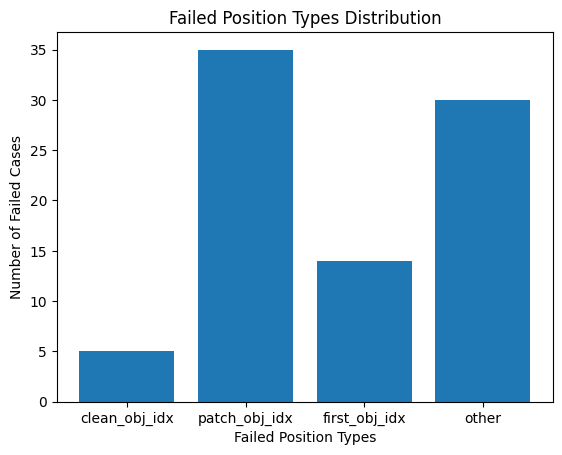

In [60]:
from matplotlib import pyplot as plt
x_vals = failed_pos_track.keys()
y_vals = [len(failed_pos_track[key]) for key in x_vals]
plt.bar(x_vals, y_vals)
plt.xlabel("Failed Position Types")
plt.ylabel("Number of Failed Cases")
plt.title("Failed Position Types Distribution")
plt.show()

## Select One -- MCQ

In [53]:
from src.selection.data import SelectionSample, SelectOneTask

select_one_mcq = SelectOneTask.load(
    path=os.path.join(
        env_utils.DEFAULT_DATA_DIR, 
        "selection", 
        "objects.json"
        # "profession.json"
        # "nationality.json"
        # "landmarks.json"
    )
)
print(select_one_mcq)

['name', 'prompt_templates', 'odd_one_prompt_templates', 'order_prompt_templates', 'count_prompt_templates', 'yes_no_prompt_templates', 'first_item_in_cat_prompt_templates', 'last_item_in_cat_prompt_templates', 'categories', 'exclude_categories']
SelectOneTask: (different objects)
Categories: fruit(15), vehicle(15), furniture(15), animal(15), music instrument(15), clothing(15), electronics(14), sport equipment(15), kitchen appliance(15), vegetable(14), building(15), office supply(15), bathroom item(15), flower(15), tree(15), jewelry(15)



In [54]:
import copy
from src.selection.utils import get_first_token_id
from src.functional import predict_next_token
from src.selection.data import MCQify_sample

test_sample = select_one_task.get_random_sample(
    mt=mt,
    option_style=OPTION_STYLE,
    prompt_template_idx=3,
    category="fruit",
    # category="actor",
    # category="United Kingdom",
    filter_by_lm_prediction=True,
)

test_sample = MCQify_sample(mt, test_sample)
print(
    test_sample.prompt(), ">>", f'"{mt.tokenizer.decode([test_sample.ans_token_id])}"'
)

predict_next_token(mt=mt, inputs=test_sample.prompt())

fruit >> ['Grape', 'Peach', 'Plum', 'Banana', 'Apple', 'Blueberry', 'Watermelon', 'Pineapple', 'Orange', 'Kiwi', 'Cherry', 'Pear', 'Strawberry', 'Mango', 'Raspberry']
a. Shirt
b. Laptop
c. Soap
d. Toaster
e. Pear
f. Bus
Which among these objects mentioned above is a fruit?
Answer: >> " e"


[[PredictedToken(token=' e', prob=0.578125, logit=22.25, token_id=384, metadata=None),
  PredictedToken(token=' (', prob=0.2734375, logit=21.5, token_id=320, metadata=None),
  PredictedToken(token=' Pear', prob=0.0537109375, logit=19.875, token_id=23910, metadata=None),
  PredictedToken(token=' Option', prob=0.036865234375, logit=19.5, token_id=7104, metadata=None),
  PredictedToken(token=' The', prob=0.025390625, logit=19.125, token_id=578, metadata=None)]]

In [55]:
attn_pattern = verify_head_patterns(
    prompt=test_sample.prompt(),
    options=test_sample.options,
    mt=mt,
    heads=optimized_heads,
    # heads = HEADS,
    # heads = [(35, 19)],
    start_from=1
)

2025-10-26 17:37:57 src.selection.functional DEBUG    Predictions: ['" e"[384] (p=0.578, logit=22.250)', '" ("[320] (p=0.273, logit=21.500)', '" Pear"[23910] (p=0.054, logit=19.875)', '" Option"[7104] (p=0.037, logit=19.500)', '" The"[578] (p=0.025, logit=19.125)']
2025-10-26 17:37:57 src.selection.functional INFO     Combined attention matrix for all heads


In [56]:
from src.selection.data import CounterFactualSamplePair
import random

validation_set = []
validation_limit = 512

validation_samples_load_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "selection",
    "samples",
    "validation",
    mt.name.split("/")[-1],
    select_one_task.task_name,
    "objects",
    # "profession",
    # "nationality"
    # "landmarks"
)

sample_files = [
    os.path.join(validation_samples_load_path, f)
    for f in os.listdir(validation_samples_load_path)
    if f.endswith(".json")
]
logger.info(f"Found {len(sample_files)} sample files")

random.shuffle(sample_files)
sample_files = sample_files[:validation_limit]
for sample_file in sample_files:
    with open(sample_file, "r") as f:
        cf_pair_data = json.load(f)
    cf_pair = CounterFactualSamplePair.from_dict(cf_pair_data)
    pred_target_token_id = cf_pair.clean_sample.metadata["track_type_obj_token_id"]
    pred_obj_idx = cf_pair.clean_sample.metadata["track_type_obj_idx"]

    cf_pair.clean_sample.metadata["track_type_obj_token_id"] = get_first_token_id(
        name=chr(ord('a') + pred_obj_idx),
        tokenizer=mt.tokenizer,
        prefix=" "
    )

    validation_set.append((
        MCQify_sample(tokenizer = mt.tokenizer, sample = cf_pair.clean_sample, start_from="a"), 
        MCQify_sample(tokenizer = mt.tokenizer, sample = cf_pair.patch_sample, start_from="p")
    ))

len(validation_set)

2025-10-26 17:38:01 __main__ INFO     Found 1024 sample files


512

In [57]:
clean, patch = validation_set[3]
print(patch.prompt(), ">>", mt.tokenizer.decode(patch.ans_token_id))
print(clean.prompt(), ">>", mt.tokenizer.decode(clean.ans_token_id))
clean.metadata["track_type_obj_token_id"], mt.tokenizer.decode(clean.metadata["track_type_obj_token_id"])

p. Ottoman
q. Paperclip
r. Church
s. Brooch
t. Cat
u. Shorts
Which among these objects mentioned above is a furniture?
Answer: >>  p
a. Cucumber
b. Mosque
c. Lotion
d. Stool
e. Tape
f. Skirt
Which among these objects mentioned above is a office supply?
Answer: >>  e


(294, ' d')

In [58]:
from src.selection.optimization import validate_q_proj_ie_on_sample_pair
import copy

clean, patch = copy.deepcopy(validation_set[5])
# failed_case = failed_pos_track["patch_obj_idx"][5]
# clean = failed_case["clean_sample"]
# patch = failed_case["patch_sample"]
# clean.default_option_style="numbered"
# patch.default_option_style="numbered"

val_sample_result = validate_q_proj_ie_on_sample_pair(
    mt=mt,
    clean_sample=clean,
    patch_sample=patch,
    heads=optimized_heads,
    query_indices={-2: -2, -1: -1},
    add_ques_pos_to_query_indices=True,
    verify_head_behavior_on=-1,
    patch_args={
        "batch_size": len(patch.options),
        "distinct_options": False,
        # "task": select_task,
        # "prompt_template_idx": prompt_template_idx,
        # "option_style": patch.default_option_style,
        # "n_distractors": N_DISTRACTORS,
    },
)

clean_obj = clean.ans_token_id
target_obj = clean.metadata["track_type_obj_token_id"]

logger.debug(f"clean obj: {mt.tokenizer.decode(clean_obj)}")
logger.debug(f"target obj: {mt.tokenizer.decode(target_obj)}")

before_intervention = {
    "clean_rank": val_sample_result["clean_track"][clean_obj][0],
    "clean_logit": val_sample_result["clean_track"][clean_obj][1].logit,
    "target_rank": val_sample_result["clean_track"][target_obj][0],
    "target_logit": val_sample_result["clean_track"][target_obj][1].logit,
}

after_intervention = {
    "clean_rank": val_sample_result["int_track"][clean_obj][0],
    "clean_logit": val_sample_result["int_track"][clean_obj][1].logit,
    "target_rank": val_sample_result["int_track"][target_obj][0],
    "target_logit": val_sample_result["int_track"][target_obj][1].logit,
}

clean_rank_delta = after_intervention["clean_rank"] - before_intervention["clean_rank"]
target_rank_delta = (
    after_intervention["target_rank"] - before_intervention["target_rank"]
)
logger.info(
    f"Clean Prediction Rank Change: {before_intervention['clean_rank']} -> {after_intervention['clean_rank']} | Delta: {clean_rank_delta} "
)
logger.info(
    f"Target Prediction Rank Change: {before_intervention['target_rank']} -> {after_intervention['target_rank']} | Delta: {target_rank_delta} "
)

clean_logit_delta = (
    after_intervention["clean_logit"] - before_intervention["clean_logit"]
)
target_logit_delta = (
    after_intervention["target_logit"] - before_intervention["target_logit"]
)
logger.info(
    f"Clean Prediction Logit Change: {before_intervention['clean_logit']:.4f} -> {after_intervention['clean_logit']:.4f} | Delta: {clean_logit_delta:.4f} "
)
logger.info(
    f"Target Prediction Logit Change: {before_intervention['target_logit']:.4f} -> {after_intervention['target_logit']:.4f} | Delta: {target_logit_delta:.4f} "
)

2025-10-26 17:38:06 src.selection.optimization DEBUG    Sampling 3 patch samples...
2025-10-26 17:38:06 src.selection.optimization DEBUG    torch.Size([3, 28])
2025-10-26 17:38:06 src.selection.optimization INFO     Verifying head behavior...
2025-10-26 17:38:06 src.selection.optimization INFO     Clean Sample >> Ans:  a


The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


2025-10-26 17:38:10 src.selection.functional DEBUG    Generated full answer: " a. Truck
Explanation: A truck is a vehicle used for transporting goods or materials. It is a type of automobile designed for carrying heavy loads."
2025-10-26 17:38:10 src.selection.functional DEBUG    Predictions: ['" a"[264] (p=0.777, logit=22.125)', '" ("[320] (p=0.056, logit=19.500)', '" Truck"[34785] (p=0.056, logit=19.500)', '" The"[578] (p=0.050, logit=19.375)', '" A"[362] (p=0.034, logit=19.000)']
2025-10-26 17:38:10 src.selection.functional INFO     Combined attention matrix for all heads


2025-10-26 17:38:10 src.selection.optimization INFO     Patch Sample >> Ans:  q


The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


2025-10-26 17:38:15 src.selection.functional DEBUG    Generated full answer: " q. Pendant
Explanation: Pendant is a type of jewelry. It is a piece of jewelry that is suspended from a chain and worn around the neck"
2025-10-26 17:38:16 src.selection.functional DEBUG    Predictions: ['" q"[2874] (p=0.570, logit=20.375)', '" Pendant"[81501] (p=0.186, logit=19.250)', '" ("[320] (p=0.068, logit=18.250)', '" The"[578] (p=0.042, logit=17.750)', '" p"[281] (p=0.042, logit=17.750)']
2025-10-26 17:38:16 src.selection.functional INFO     Combined attention matrix for all heads


2025-10-26 17:38:16 src.selection.optimization INFO     Caching the query states for the 20 heads
2025-10-26 17:38:16 src.selection.optimization INFO     patch_prediction=['" q"[2874] (p=0.570, logit=20.375)', '" Pendant"[81501] (p=0.186, logit=19.250)', '" ("[320] (p=0.068, logit=18.250)', '" The"[578] (p=0.042, logit=17.750)', '" p"[281] (p=0.042, logit=17.750)']
2025-10-26 17:38:16 src.selection.optimization INFO     clean run
2025-10-26 17:38:16 src.selection.optimization INFO     clean_prediction=['" a"[264] (p=0.777, logit=22.125)', '" Truck"[34785] (p=0.056, logit=19.500)', '" ("[320] (p=0.056, logit=19.500)', '" The"[578] (p=0.050, logit=19.375)', '" A"[362] (p=0.034, logit=19.000)']
2025-10-26 17:38:16 src.selection.optimization INFO     clean_track=OrderedDict([(264, (1, PredictedToken(token=' a', prob=0.77734375, logit=22.125, token_id=264, metadata=None))), (293, (8, PredictedToken(token=' b', prob=0.0021820068359375, logit=16.25, token_id=293, metadata=None))), (272, (13, 

2025-10-26 17:38:17 src.selection.optimization INFO     int_prediction=['" c"[272] (p=0.688, logit=21.250)', '" ("[320] (p=0.082, logit=19.125)', '" Bro"[6031] (p=0.056, logit=18.750)', '" The"[578] (p=0.044, logit=18.500)', '" C"[356] (p=0.027, logit=18.000)']
2025-10-26 17:38:17 src.selection.optimization INFO     int_track=OrderedDict([(272, (1, PredictedToken(token=' c', prob=0.6875, logit=21.25, token_id=272, metadata=None))), (293, (7, PredictedToken(token=' b', prob=0.020751953125, logit=17.75, token_id=293, metadata=None))), (264, (10, PredictedToken(token=' a', prob=0.005950927734375, logit=16.5, token_id=264, metadata=None))), (2874, (1329, PredictedToken(token=' q', prob=4.172325134277344e-07, logit=6.9375, token_id=2874, metadata=None)))])
2025-10-26 17:38:17 __main__ DEBUG    clean obj:  a
2025-10-26 17:38:17 __main__ DEBUG    target obj:  c
2025-10-26 17:38:17 __main__ INFO     Clean Prediction Rank Change: 1 -> 10 | Delta: 9 
2025-10-26 17:38:17 __main__ INFO     Target 

In [59]:
from tqdm.auto import tqdm

validation_results = []

for clean_sample, patch_sample in tqdm(validation_set):
    # patch_sample.default_option_style="numbered"
    val_sample_result = validate_q_proj_ie_on_sample_pair(
        mt=mt,
        clean_sample=clean_sample,
        patch_sample=patch_sample,
        heads=optimized_heads,
        query_indices={-2: -2, -1: -1},
        add_ques_pos_to_query_indices=True,
        patch_args={
            "batch_size": len(patch_sample.options),
            "distinct_options": False,
            # "task": select_task,
            # "prompt_template_idx": prompt_template_idx,
            # "option_style": patch.default_option_style,
            # "n_distractors": N_DISTRACTORS,
        },
    )
    validation_results.append(val_sample_result)
    print("=" * 80)

  0%|          | 0/512 [00:00<?, ?it/s]

2025-10-26 17:38:21 src.selection.optimization DEBUG    Sampling 5 patch samples...


2025-10-26 17:38:21 src.selection.optimization DEBUG    torch.Size([5, 36])
2025-10-26 17:38:21 src.selection.optimization INFO     Caching the query states for the 20 heads
2025-10-26 17:38:22 src.selection.optimization INFO     patch_prediction=['" p"[281] (p=0.715, logit=21.750)', '" Option"[7104] (p=0.110, logit=19.875)', '" ("[320] (p=0.059, logit=19.250)', '" Z"[1901] (p=0.046, logit=19.000)', '" z"[1167] (p=0.022, logit=18.250)']
2025-10-26 17:38:22 src.selection.optimization INFO     clean run
2025-10-26 17:38:22 src.selection.optimization INFO     clean_prediction=['" b"[293] (p=0.727, logit=22.000)', '" ("[320] (p=0.126, logit=20.250)', '" Basketball"[47589] (p=0.053, logit=19.375)', '" The"[578] (p=0.036, logit=19.000)', '" B"[426] (p=0.017, logit=18.250)']
2025-10-26 17:38:22 src.selection.optimization INFO     clean_track=OrderedDict([(293, (1, PredictedToken(token=' b', prob=0.7265625, logit=22.0, token_id=293, metadata=None))), (264, (8, PredictedToken(token=' a', prob=0

In [60]:
before_intervention = []
after_intervention = []

for intervention_result in validation_results:
    clean_sample = intervention_result["clean_sample"]
    patch_sample = intervention_result["patch_sample"]

    clean_obj = clean_sample.ans_token_id
    target_obj = clean_sample.metadata["track_type_obj_token_id"]

    before_intervention.append({
        "clean_rank": intervention_result["clean_track"][clean_obj][0],
        "clean_logit": intervention_result["clean_track"][clean_obj][1].logit,
        "target_rank": intervention_result["clean_track"][target_obj][0],
        "target_logit": intervention_result["clean_track"][target_obj][1].logit,
    })

    after_intervention.append({
        "clean_rank": intervention_result["int_track"][clean_obj][0],
        "clean_logit": intervention_result["int_track"][clean_obj][1].logit,
        "target_rank": intervention_result["int_track"][target_obj][0],
        "target_logit": intervention_result["int_track"][target_obj][1].logit,
    })

In [61]:
import numpy as np

clean_rank_delta = [
    after["clean_rank"] - before["clean_rank"]
    for before, after in zip(before_intervention, after_intervention)
]
target_rank_delta = [
    after["target_rank"] - before["target_rank"]
    for before, after in zip(before_intervention, after_intervention)
]

clean_rank_delta, target_rank_delta = np.array(clean_rank_delta), np.array(
    target_rank_delta
)
print(f"clean_rank_delta: {clean_rank_delta.mean():.4f} ± {clean_rank_delta.std():.4f}")
print(
    f"target_rank_delta: {target_rank_delta.mean():.4f} ± {target_rank_delta.std():.4f}"
)

clean_rank_after_intervention = [after["clean_rank"] for after in after_intervention]
clean_rank_after_intervention = np.array(clean_rank_after_intervention)
print(
    f"clean_rank_after_intervention: {clean_rank_after_intervention.mean():.4f} ± {clean_rank_after_intervention.std():.4f}"
)

target_rank_after_intervention = [after["target_rank"] for after in after_intervention]
target_rank_after_intervention = np.array(target_rank_after_intervention)
print(
    f"target_rank_after_intervention: {target_rank_after_intervention.mean():.4f} ± {target_rank_after_intervention.std():.4f}"
)

clean_rank_delta: 7.0098 ± 5.7417
target_rank_delta: -11.5977 ± 6.9624
clean_rank_after_intervention: 8.0312 ± 5.7482
target_rank_after_intervention: 1.5137 ± 1.5922


In [62]:
clean_logit_delta = [
    after["clean_logit"] - before["clean_logit"]
    for before, after in zip(before_intervention, after_intervention)
]
target_logit_delta = [
    after["target_logit"] - before["target_logit"]
    for before, after in zip(before_intervention, after_intervention)
]
clean_logit_delta, target_logit_delta = np.array(clean_logit_delta), np.array(target_logit_delta)
print(f"clean_logit_delta: {clean_logit_delta.mean():.4f} ± {clean_logit_delta.std():.4f}")
print(f"target_logit_delta: {target_logit_delta.mean():.4f} ± {target_logit_delta.std():.4f}")

clean_logit_after_intervention = [
    after["clean_logit"]
    for after in after_intervention
]
clean_logit_after_intervention = np.array(clean_logit_after_intervention)
print(f"clean_logit_after_intervention: {clean_logit_after_intervention.mean():.4f} ± {clean_logit_after_intervention.std():.4f}")

target_logit_after_intervention = [
    after["target_logit"]
    for after in after_intervention
]
target_logit_after_intervention = np.array(target_logit_after_intervention)
print(f"target_logit_after_intervention: {target_logit_after_intervention.mean():.4f} ± {target_logit_after_intervention.std():.4f}")

clean_logit_delta: -4.7180 ± 1.7144
target_logit_delta: 4.4156 ± 1.4238
clean_logit_after_intervention: 16.9075 ± 1.7104
target_logit_after_intervention: 20.0845 ± 1.2603


In [63]:
top_1 = sum([1 for after in after_intervention if after["target_rank"] == 1])
top_1 / len(after_intervention)

0.81640625

In [64]:
counter_patch_type_top_option = 0
failed_cases = []

for intervention_result in validation_results:
    clean_sample = intervention_result["clean_sample"]
    patch_sample = intervention_result["patch_sample"]
    int_track = intervention_result["int_track"]
    clean_track = intervention_result["clean_track"]
    if (
        int_track[list(int_track.keys())[0]][1].token_id
        == clean_sample.metadata["track_type_obj_token_id"]
    ): 
        counter_patch_type_top_option += 1
    else:
        failed_cases.append(
            {
                "clean_sample": clean_sample,
                "patch_sample": patch_sample,
                "int_track": int_track,
                "clean_track": clean_track,
            }
        )

top_1_accuracy = counter_patch_type_top_option / len(validation_results)
print("=" * 80)
print(
    f"Counterfactual patching accuracy: {top_1_accuracy:.4f} ({counter_patch_type_top_option}/{len(validation_results)})"
)
print("=" * 80)
print(f"{len(failed_cases)}")

Counterfactual patching accuracy: 0.8418 (431/512)
81


## SelectFirst Task

In [15]:
from src.selection.data import SelectionSample, SelectFirstTask

select_first_task = SelectFirstTask.load(
    path=os.path.join(
        env_utils.DEFAULT_DATA_DIR, 
        "selection", 
        "objects.json"
    )
)
print(select_first_task)

SelectFirstTask: (different objects)
Categories: fruit(15), vehicle(15), furniture(15), animal(15), music instrument(15), clothing(15), electronics(14), sport equipment(15), kitchen appliance(15), vegetable(14), building(15), office supply(15), bathroom item(15), flower(15), tree(15), jewelry(15)



In [16]:
test_sample = select_first_task.get_random_sample(
    mt = mt,
    option_style="single_line",
    prompt_template_idx=3,
    category="fruit",
    filter_by_lm_prediction=True,
)
print(test_sample.prompt(), ">>", f'"{mt.tokenizer.decode([test_sample.ans_token_id])}"')
test_sample.prediction

fruit >> ['Strawberry', 'Cherry', 'Raspberry', 'Mango', 'Pear', 'Plum', 'Kiwi', 'Apple', 'Watermelon', 'Banana', 'Orange', 'Peach', 'Grape', 'Blueberry', 'Pineapple']
Options: Surfboard, Train, Racket, Pineapple, Toaster, Grape, Horse, Pear.
What is the first fruit from the list above?
Answer: >> " Pine"


[PredictedToken(token=' Pine', prob=0.76953125, logit=21.375, token_id=42609, metadata=None),
 PredictedToken(token=' The', prob=0.1513671875, logit=19.75, token_id=578, metadata=None),
 PredictedToken(token=' Grape', prob=0.023193359375, logit=17.875, token_id=80629, metadata=None),
 PredictedToken(token=' A', prob=0.012451171875, logit=17.25, token_id=362, metadata=None),
 PredictedToken(token=' Pear', prob=0.00665283203125, logit=16.625, token_id=23910, metadata=None)]

In [17]:
from src.selection.functional import verify_head_patterns

attn_pattern = verify_head_patterns(
    prompt=test_sample.prompt(option_style="single_line"),
    options=test_sample.options,
    mt=mt,
    heads=optimized_heads,
    # heads = HEADS,
    # heads = [(35, 19)],
    start_from=1
)

2025-10-26 17:48:39 src.selection.functional DEBUG    Predictions: ['" Pine"[42609] (p=0.770, logit=21.375)', '" The"[578] (p=0.151, logit=19.750)', '" Grape"[80629] (p=0.023, logit=17.875)', '" A"[362] (p=0.012, logit=17.250)', '" Pear"[23910] (p=0.007, logit=16.625)']
2025-10-26 17:48:39 src.selection.functional INFO     Combined attention matrix for all heads


In [ ]:
from src.selection.data import CounterFactualSamplePair
from src.functional import free_gpu_cache
from src.selection.data import get_counterfactual_samples_interface
import random

validation_samples_save_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "selection",
    "samples",
    "validation",
    mt.name.split("/")[-1],
    select_first_task.task_name,
    "objects",
)

os.makedirs(validation_samples_save_path, exist_ok=True)


free_gpu_cache()
validation_set = []
validation_limit = 256
start_number = 257


counterfactual_sampler = get_counterfactual_samples_interface[select_first_task.task_name]

while len(validation_set) < validation_limit:
    print(f"sample {len(validation_set)+1} / {validation_limit}")
    patch, clean = counterfactual_sampler(
        mt=mt,
        task=select_first_task,
        filter_by_lm_prediction=True,
        prompt_template_idx=3,
        option_style=OPTION_STYLE,
        n_distractors=random.choice(range(4, 7)),
    )
    validation_set.append((clean, patch))
    cf_pair = CounterFactualSamplePair(
        patch_sample=patch,
        clean_sample=clean,
    )
    cf_pair.detensorize()
    with open(
        os.path.join(validation_samples_save_path, f"{len(validation_set) + start_number - 1:05d}.json"),
        "w",
    ) as f:
        json.dump(cf_pair.to_dict(), f, indent=2)

len(validation_set)

sample 1 / 256
2025-10-26 17:46:13 src.selection.data DEBUG    Options: Gloves, Dress, Violin, Folder, Guitar.
What is the first clothing from the list above?
Answer: >>  Gloves
2025-10-26 17:46:14 src.selection.data ERROR    Prediction mismatch: (2, PredictedToken(token=' Dress', prob=0.28515625, logit=19.75, token_id=29318, metadata=None))[" The"] != 68554[" Gloves"]
2025-10-26 17:46:14 src.selection.data DEBUG    Options: Toilet paper, Gloves, Cello, Drum, Hat.
What is the first clothing from the list above?
Answer: >>  Gloves
2025-10-26 17:46:14 src.selection.data ERROR    Prediction mismatch: (1, PredictedToken(token=' Hat', prob=0.51171875, logit=20.125, token_id=22050, metadata=None))[" Hat"] != 68554[" Gloves"]
2025-10-26 17:46:14 src.selection.data DEBUG    Options: Drum, Skirt, School, Jeans, Piano.
What is the first clothing from the list above?
Answer: >>  Sk
2025-10-26 17:46:14 src.selection.data DEBUG    Options: Jacket, Accordion, Temple, Pants, Harmonica.
What is the fi

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f665ca89b50>>
Traceback (most recent call last):
  File "/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


sample 2 / 256
2025-10-26 17:46:19 src.selection.data DEBUG    Options: Eagle, Tiger, Charm, Church, Apartment.
What is the first building from the list above?
Answer: >>  Church
2025-10-26 17:46:19 src.selection.data DEBUG    Options: House, Temple, Bracelet, Monkey, Bear.
What is the first animal from the list above?
Answer: >>  Monkey
2025-10-26 17:46:19 src.selection.data DEBUG    Options: House, Temple, Bracelet, Monkey, Bear.
What is the first building from the list above?
Answer: >>  House
sample 3 / 256
2025-10-26 17:46:24 src.selection.data DEBUG    Options: Ruler, Van, Coffee table, Scissors, Bike.
What is the first vehicle from the list above?
Answer: >>  Van
2025-10-26 17:46:24 src.selection.data DEBUG    Options: Airplane, Ottoman, Eraser, Yacht, Pen.
What is the first office supply from the list above?
Answer: >>  Er
2025-10-26 17:46:24 src.selection.data ERROR    Prediction mismatch: (1, PredictedToken(token=' Pen', prob=0.5078125, logit=20.75, token_id=13597, metadata=N

In [19]:
from src.selection.data import CounterFactualSamplePair
import random
from src.functional import free_gpu_cache

free_gpu_cache()
validation_set = []
validation_limit = 512

validation_samples_load_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "selection",
    "samples",
    "validation",
    mt.name.split("/")[-1],
    select_first_task.task_name,
    "objects",
)

sample_files = [
    os.path.join(validation_samples_load_path, f)
    for f in os.listdir(validation_samples_load_path)
    if f.endswith(".json")
]
logger.info(f"Found {len(sample_files)} sample files")

random.shuffle(sample_files)
sample_files = sample_files[:validation_limit]
for sample_file in sample_files:
    with open(sample_file, "r") as f:
        cf_pair_data = json.load(f)
    cf_pair = CounterFactualSamplePair.from_dict(cf_pair_data)
    validation_set.append((cf_pair.clean_sample, cf_pair.patch_sample))

len(validation_set)

2025-10-26 17:49:10 __main__ INFO     Found 512 sample files


512

In [20]:
clean, patch = validation_set[3]
print(patch.prompt(), ">>", mt.tokenizer.decode(patch.ans_token_id))
print(clean.prompt(), ">>", mt.tokenizer.decode(clean.ans_token_id))
clean.metadata["track_type_obj_token_id"], mt.tokenizer.decode(clean.metadata["track_type_obj_token_id"])

Options: Horse, Rice cooker, Chair, Bear, Recliner.
What is the first furniture from the list above?
Answer: >>  Chair
Options: Cat, Stool, Desk, Refrigerator, Rabbit.
What is the first animal from the list above?
Answer: >>  Cat


(800, ' St')

In [21]:
from src.selection.optimization import validate_q_proj_ie_on_sample_pair

clean, patch = validation_set[15]
val_sample_result = validate_q_proj_ie_on_sample_pair(
    mt=mt,
    clean_sample=clean,
    patch_sample=patch,
    heads=optimized_heads,
    query_indices={-2: -2, -1: -1},
    add_ques_pos_to_query_indices=True,
    verify_head_behavior_on=-1,
)

clean_obj = clean.ans_token_id
target_obj = clean.metadata["track_type_obj_token_id"]

logger.debug(f"clean obj: {mt.tokenizer.decode(clean_obj)}")
logger.debug(f"target obj: {mt.tokenizer.decode(target_obj)}")

before_intervention = {
    "clean_rank": val_sample_result["clean_track"][clean_obj][0],
    "clean_logit": val_sample_result["clean_track"][clean_obj][1].logit,
    "target_rank": val_sample_result["clean_track"][target_obj][0],
    "target_logit": val_sample_result["clean_track"][target_obj][1].logit,
}

after_intervention = {
    "clean_rank": val_sample_result["int_track"][clean_obj][0],
    "clean_logit": val_sample_result["int_track"][clean_obj][1].logit,
    "target_rank": val_sample_result["int_track"][target_obj][0],
    "target_logit": val_sample_result["int_track"][target_obj][1].logit,
}

clean_rank_delta = after_intervention["clean_rank"] - before_intervention["clean_rank"]
target_rank_delta = (
    after_intervention["target_rank"] - before_intervention["target_rank"]
)
logger.info(
    f"Clean Prediction Rank Change: {before_intervention['clean_rank']} -> {after_intervention['clean_rank']} | Delta: {clean_rank_delta} "
)
logger.info(
    f"Target Prediction Rank Change: {before_intervention['target_rank']} -> {after_intervention['target_rank']} | Delta: {target_rank_delta} "
)

clean_logit_delta = (
    after_intervention["clean_logit"] - before_intervention["clean_logit"]
)
target_logit_delta = (
    after_intervention["target_logit"] - before_intervention["target_logit"]
)
logger.info(
    f"Clean Prediction Logit Change: {before_intervention['clean_logit']:.4f} -> {after_intervention['clean_logit']:.4f} | Delta: {clean_logit_delta:.4f} "
)
logger.info(
    f"Target Prediction Logit Change: {before_intervention['target_logit']:.4f} -> {after_intervention['target_logit']:.4f} | Delta: {target_logit_delta:.4f} "
)

2025-10-26 17:49:13 src.selection.optimization INFO     Verifying head behavior...
2025-10-26 17:49:13 src.selection.optimization INFO     Clean Sample >> Ans:  Boat


The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
You have set `compile_config`, but we are unable to meet the criteria for compilation. Compilation will be skipped.


2025-10-26 17:49:18 src.selection.functional DEBUG    Generated full answer: " Boat.
Explanation: The first vehicle from the list above is the boat. The other options, such as airplane, are also vehicles, but the question"
2025-10-26 17:49:18 src.selection.functional DEBUG    Predictions: ['" Boat"[45332] (p=0.656, logit=21.625)', '" The"[578] (p=0.188, logit=20.375)', '" Air"[6690] (p=0.048, logit=19.000)', '" A"[362] (p=0.042, logit=18.875)', '" BO"[7967] (p=0.017, logit=18.000)']
2025-10-26 17:49:18 src.selection.functional INFO     Combined attention matrix for all heads


2025-10-26 17:49:18 src.selection.optimization INFO     Patch Sample >> Ans:  Tie


The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


2025-10-26 17:49:23 src.selection.functional DEBUG    Generated full answer: " Skirt.
Explanation: The first clothing from the list above is a skirt. A skirt is a type of garment that is worn around the waist and"
2025-10-26 17:49:23 src.selection.functional DEBUG    Predictions: ['" Tie"[59825] (p=0.336, logit=20.125)', '" Sk"[4923] (p=0.297, logit=20.000)', '" The"[578] (p=0.231, logit=19.750)', '" A"[362] (p=0.075, logit=18.625)', '" SK"[12343] (p=0.009, logit=16.500)']
2025-10-26 17:49:23 src.selection.functional INFO     Combined attention matrix for all heads


2025-10-26 17:49:23 src.selection.optimization INFO     Caching the query states for the 20 heads
2025-10-26 17:49:24 src.selection.optimization INFO     patch_prediction=['" Tie"[59825] (p=0.336, logit=20.125)', '" Sk"[4923] (p=0.297, logit=20.000)', '" The"[578] (p=0.231, logit=19.750)', '" A"[362] (p=0.075, logit=18.625)', '" SK"[12343] (p=0.009, logit=16.500)']
2025-10-26 17:49:24 src.selection.optimization INFO     clean run
2025-10-26 17:49:24 src.selection.optimization INFO     clean_prediction=['" Boat"[45332] (p=0.656, logit=21.625)', '" The"[578] (p=0.188, logit=20.375)', '" Air"[6690] (p=0.048, logit=19.000)', '" A"[362] (p=0.042, logit=18.875)', '" BO"[7967] (p=0.017, logit=18.000)']
2025-10-26 17:49:24 src.selection.optimization INFO     clean_track=OrderedDict([(45332, (1, PredictedToken(token=' Boat', prob=0.65625, logit=21.625, token_id=45332, metadata=None))), (6690, (3, PredictedToken(token=' Air', prob=0.047607421875, logit=19.0, token_id=6690, metadata=None))), (328

2025-10-26 17:49:24 src.selection.optimization INFO     int_prediction=['" S"[328] (p=0.434, logit=20.750)', '" Boat"[45332] (p=0.297, logit=20.375)', '" The"[578] (p=0.124, logit=19.500)', '" Scar"[30760] (p=0.066, logit=18.875)', '" A"[362] (p=0.022, logit=17.750)']
2025-10-26 17:49:24 src.selection.optimization INFO     int_track=OrderedDict([(328, (1, PredictedToken(token=' S', prob=0.43359375, logit=20.75, token_id=328, metadata=None))), (45332, (2, PredictedToken(token=' Boat', prob=0.296875, logit=20.375, token_id=45332, metadata=None))), (30760, (4, PredictedToken(token=' Scar', prob=0.06640625, logit=18.875, token_id=30760, metadata=None))), (6690, (6, PredictedToken(token=' Air', prob=0.0079345703125, logit=16.75, token_id=6690, metadata=None))), (16730, (9, PredictedToken(token=' Museum', prob=0.00274658203125, logit=15.6875, token_id=16730, metadata=None))), (59825, (694, PredictedToken(token=' Tie', prob=1.341104507446289e-06, logit=8.0625, token_id=59825, metadata=None)))

In [22]:
from tqdm.auto import tqdm

validation_results = []

for clean_sample, patch_sample in tqdm(validation_set):
    val_sample_result = validate_q_proj_ie_on_sample_pair(
        mt=mt,
        clean_sample=clean_sample,
        patch_sample=patch_sample,
        heads=optimized_heads,
        query_indices={-2: -2, -1: -1},
        add_ques_pos_to_query_indices=True,
        patch_args={
            "batch_size": len(patch.options),
            "distinct_options": False,
        },
    )
    validation_results.append(val_sample_result)
    print("=" * 80)

  0%|          | 0/512 [00:00<?, ?it/s]

2025-10-26 17:50:33 src.selection.optimization DEBUG    Sampling 5 patch samples...
2025-10-26 17:50:33 src.selection.optimization DEBUG    torch.Size([5, 33])
2025-10-26 17:50:33 src.selection.optimization INFO     Caching the query states for the 20 heads
2025-10-26 17:50:33 src.selection.optimization INFO     patch_prediction=['" Soap"[61731] (p=0.898, logit=22.000)', '" SOAP"[64332] (p=0.027, logit=18.500)', '" Sh"[1443] (p=0.024, logit=18.375)', '" The"[578] (p=0.019, logit=18.125)', '" Y"[816] (p=0.006, logit=17.000)']
2025-10-26 17:50:33 src.selection.optimization INFO     clean run
2025-10-26 17:50:33 src.selection.optimization INFO     clean_prediction=['" Orch"[55405] (p=0.777, logit=21.750)', '" The"[578] (p=0.153, logit=20.125)', '" An"[1556] (p=0.021, logit=18.125)', '" OR"[2794] (p=0.016, logit=17.875)', '" Pe"[5250] (p=0.009, logit=17.250)']
2025-10-26 17:50:33 src.selection.optimization INFO     clean_track=OrderedDict([(55405, (1, PredictedToken(token=' Orch', prob=0.7

In [23]:
before_intervention = []
after_intervention = []

for intervention_result in validation_results:
    clean_sample = intervention_result["clean_sample"]
    patch_sample = intervention_result["patch_sample"]

    clean_obj = clean_sample.ans_token_id
    target_obj = clean_sample.metadata["track_type_obj_token_id"]

    before_intervention.append({
        "clean_rank": intervention_result["clean_track"][clean_obj][0],
        "clean_logit": intervention_result["clean_track"][clean_obj][1].logit,
        "target_rank": intervention_result["clean_track"][target_obj][0],
        "target_logit": intervention_result["clean_track"][target_obj][1].logit,
    })

    after_intervention.append({
        "clean_rank": intervention_result["int_track"][clean_obj][0],
        "clean_logit": intervention_result["int_track"][clean_obj][1].logit,
        "target_rank": intervention_result["int_track"][target_obj][0],
        "target_logit": intervention_result["int_track"][target_obj][1].logit,
    })

In [24]:
import numpy as np

clean_rank_delta = [
    after["clean_rank"] - before["clean_rank"]
    for before, after in zip(before_intervention, after_intervention)
]
target_rank_delta = [
    after["target_rank"] - before["target_rank"]
    for before, after in zip(before_intervention, after_intervention)
]

clean_rank_delta, target_rank_delta = np.array(clean_rank_delta), np.array(
    target_rank_delta
)
print(f"clean_rank_delta: {clean_rank_delta.mean():.4f} ± {clean_rank_delta.std():.4f}")
print(
    f"target_rank_delta: {target_rank_delta.mean():.4f} ± {target_rank_delta.std():.4f}"
)

clean_rank_after_intervention = [after["clean_rank"] for after in after_intervention]
clean_rank_after_intervention = np.array(clean_rank_after_intervention)
print(
    f"clean_rank_after_intervention: {clean_rank_after_intervention.mean():.4f} ± {clean_rank_after_intervention.std():.4f}"
)

target_rank_after_intervention = [after["target_rank"] for after in after_intervention]
target_rank_after_intervention = np.array(target_rank_after_intervention)
print(
    f"target_rank_after_intervention: {target_rank_after_intervention.mean():.4f} ± {target_rank_after_intervention.std():.4f}"
)

clean_rank_delta: 1.3574 ± 2.9167
target_rank_delta: -139.6738 ± 328.5040
clean_rank_after_intervention: 2.4023 ± 2.9118
target_rank_after_intervention: 2.7812 ± 2.0461


In [25]:
clean_logit_delta = [
    after["clean_logit"] - before["clean_logit"]
    for before, after in zip(before_intervention, after_intervention)
]
target_logit_delta = [
    after["target_logit"] - before["target_logit"]
    for before, after in zip(before_intervention, after_intervention)
]
clean_logit_delta, target_logit_delta = np.array(clean_logit_delta), np.array(target_logit_delta)
print(f"clean_logit_delta: {clean_logit_delta.mean():.4f} ± {clean_logit_delta.std():.4f}")
print(f"target_logit_delta: {target_logit_delta.mean():.4f} ± {target_logit_delta.std():.4f}")

clean_logit_after_intervention = [
    after["clean_logit"]
    for after in after_intervention
]
clean_logit_after_intervention = np.array(clean_logit_after_intervention)
print(f"clean_logit_after_intervention: {clean_logit_after_intervention.mean():.4f} ± {clean_logit_after_intervention.std():.4f}")

target_logit_after_intervention = [
    after["target_logit"]
    for after in after_intervention
]
target_logit_after_intervention = np.array(target_logit_after_intervention)
print(f"target_logit_after_intervention: {target_logit_after_intervention.mean():.4f} ± {target_logit_after_intervention.std():.4f}")

clean_logit_delta: -1.5803 ± 1.4053
target_logit_delta: 5.7541 ± 2.6287
clean_logit_after_intervention: 19.3816 ± 1.4747
target_logit_after_intervention: 18.9159 ± 1.3832


In [26]:
top_1 = sum([1 for after in after_intervention if after["target_rank"] == 1])
top_1 / len(after_intervention)

0.326171875

In [27]:
counter_patch_type_top_option = 0
failed_cases = []

for intervention_result in validation_results:
    clean_sample = intervention_result["clean_sample"]
    patch_sample = intervention_result["patch_sample"]
    int_track = intervention_result["int_track"]
    clean_track = intervention_result["clean_track"]
    if (
        int_track[list(int_track.keys())[0]][1].token_id
        == clean_sample.metadata["track_type_obj_token_id"]
    ): 
        counter_patch_type_top_option += 1
    else:
        failed_cases.append(
            {
                "clean_sample": clean_sample,
                "patch_sample": patch_sample,
                "int_track": int_track,
                "clean_track": clean_track,
            }
        )

top_1_accuracy = counter_patch_type_top_option / len(validation_results)
print("=" * 80)
print(
    f"Counterfactual patching accuracy: {top_1_accuracy:.4f} ({counter_patch_type_top_option}/{len(validation_results)})"
)
print("=" * 80)
print(f"{len(failed_cases)}")

Counterfactual patching accuracy: 0.3555 (182/512)
330


In [28]:
for clean_sample, patch_sample in validation_set:
    assert "first" in clean_sample.prompt()
    assert "first" in patch_sample.prompt()

In [29]:
for failed_case in failed_cases:
    clean_sample = failed_case["clean_sample"]
    patch_sample = failed_case["patch_sample"]
    int_track = failed_case["int_track"]
    clean_track = failed_case["clean_track"]

    print("Clean Sample:")
    print(clean_sample.prompt(), ">>", f'"{mt.tokenizer.decode([clean_sample.ans_token_id])}"')

    print("-" * 100)
    print(
        "Track: ",
        " | Token"
        f"\"{mt.tokenizer.decode(clean_sample.metadata['track_type_obj_token_id'])}\"",
    )
    print("Clean:", f"(Token: {mt.tokenizer.decode(clean_sample.ans_token_id)})")
    print("-" * 100)

    clean_track = [pred for tok_id, (rank, pred) in clean_track.items()]
    print(f"Clean Track: {json.dumps([str(pred) for pred in clean_track], indent=4)}")

    int_track = [pred for tok_id, (rank, pred) in int_track.items()]
    print(
        f"Intervened Track: {json.dumps([str(pred) for pred in int_track], indent=4)}"
    )
    print("=" * 100)

Clean Sample:
Options: Orchid, Helicopter, Towel, Peony, Hairdryer.
What is the first flower from the list above?
Answer: >> " Orch"
----------------------------------------------------------------------------------------------------
Track:   | Token" Tow"
Clean: (Token:  Orch)
----------------------------------------------------------------------------------------------------
Clean Track: [
    "\" Orch\"[55405] (p=0.777, logit=21.750)",
    "\" Pe\"[5250] (p=0.009, logit=17.250)",
    "\" Hel\"[16183] (p=0.000, logit=14.188)",
    "\" Tow\"[41493] (p=0.000, logit=11.188)",
    "\" Hair\"[26781] (p=0.000, logit=7.438)",
    "\" Soap\"[61731] (p=0.000, logit=6.844)"
]
Intervened Track: [
    "\" Orch\"[55405] (p=0.551, logit=20.625)",
    "\" Tow\"[41493] (p=0.140, logit=19.250)",
    "\" Hel\"[16183] (p=0.051, logit=18.250)",
    "\" Hair\"[26781] (p=0.000, logit=12.625)",
    "\" Pe\"[5250] (p=0.000, logit=12.250)",
    "\" Soap\"[61731] (p=0.000, logit=7.000)"
]
Clean Sample:
Option

## SelectLast Task

In [16]:
from src.selection.data import SelectLastTask

select_last_task = SelectLastTask.load(
    path=os.path.join(
        env_utils.DEFAULT_DATA_DIR, 
        "selection", 
        "objects.json"
    )
)
print(select_last_task)

SelectLastTask: (different objects)
Categories: fruit(15), vehicle(15), furniture(15), animal(15), music instrument(15), clothing(15), electronics(14), sport equipment(15), kitchen appliance(15), vegetable(14), building(15), office supply(15), bathroom item(15), flower(15), tree(15), jewelry(15)



In [17]:
test_sample = select_last_task.get_random_sample(
    mt = mt,
    option_style="single_line",
    prompt_template_idx=3,
    category="fruit",
    filter_by_lm_prediction=True,
)
print(test_sample.prompt(), ">>", f'"{mt.tokenizer.decode([test_sample.ans_token_id])}"')
test_sample.prediction

fruit >> ['Grape', 'Peach', 'Pear', 'Orange', 'Raspberry', 'Banana', 'Plum', 'Cherry', 'Strawberry', 'Pineapple', 'Apple', 'Mango', 'Blueberry', 'Watermelon', 'Kiwi']
Options: Sheep, Strawberry, Pineapple, Pear, Violin, Motorcycle, Shirt, Tablet.
What is the last fruit in this list above?
Answer: >> " Pear"


[PredictedToken(token=' Pear', prob=0.7890625, logit=20.5, token_id=23910, metadata=None),
 PredictedToken(token=' The', prob=0.1064453125, logit=18.5, token_id=578, metadata=None),
 PredictedToken(token=' Pine', prob=0.0185546875, logit=16.75, token_id=42609, metadata=None),
 PredictedToken(token=' Strawberry', prob=0.0185546875, logit=16.75, token_id=89077, metadata=None),
 PredictedToken(token=' There', prob=0.00872802734375, logit=16.0, token_id=2684, metadata=None)]

In [18]:
from src.selection.functional import verify_head_patterns

attn_pattern = verify_head_patterns(
    prompt=test_sample.prompt(option_style="single_line"),
    options=test_sample.options,
    mt=mt,
    heads=optimized_heads,
    # heads = HEADS,
    # heads = [(35, 19)],
    start_from=1
)

2025-10-26 18:12:43 src.selection.functional DEBUG    Predictions: ['" Pear"[23910] (p=0.789, logit=20.500)', '" The"[578] (p=0.106, logit=18.500)', '" Strawberry"[89077] (p=0.019, logit=16.750)', '" Pine"[42609] (p=0.019, logit=16.750)', '" There"[2684] (p=0.009, logit=16.000)']
2025-10-26 18:12:43 src.selection.functional INFO     Combined attention matrix for all heads


In [ ]:
from src.selection.data import CounterFactualSamplePair
from src.functional import free_gpu_cache
from src.selection.data import get_counterfactual_samples_interface
import random

validation_samples_save_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "selection",
    "samples",
    "validation",
    mt.name.split("/")[-1],
    select_last_task.task_name,
    "objects",
)

os.makedirs(validation_samples_save_path, exist_ok=True)


free_gpu_cache()
validation_set = []
validation_limit = 200
start_number = 312


counterfactual_sampler = get_counterfactual_samples_interface[select_last_task.task_name]

while len(validation_set) < validation_limit:
    print(f"sample {len(validation_set)+1} / {validation_limit}")
    patch, clean = counterfactual_sampler(
        mt=mt,
        task=select_last_task,
        filter_by_lm_prediction=True,
        prompt_template_idx=3,
        option_style=OPTION_STYLE,
        n_distractors=random.choice(range(4, 7)),
    )
    validation_set.append((clean, patch))
    cf_pair = CounterFactualSamplePair(
        patch_sample=patch,
        clean_sample=clean,
    )
    cf_pair.detensorize()
    with open(
        os.path.join(validation_samples_save_path, f"{len(validation_set) + start_number - 1:05d}.json"),
        "w",
    ) as f:
        json.dump(cf_pair.to_dict(), f, indent=2)

len(validation_set)

sample 1 / 200
2025-10-26 18:10:49 src.selection.data DEBUG    Options: Shampoo, Microwave, Necklace, Charm, Shower.
What is the last jewelry in this list above?
Answer: >>  Charm
2025-10-26 18:10:49 src.selection.data DEBUG    Options: Anklet, Bangle, Bathtub, Kettle, Toothpaste.
What is the last bathroom item in this list above?
Answer: >>  Tooth
2025-10-26 18:10:49 src.selection.data DEBUG    Options: Anklet, Bangle, Bathtub, Kettle, Toothpaste.
What is the last jewelry in this list above?
Answer: >>  B


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f8ddeca95d0>>
Traceback (most recent call last):
  File "/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


sample 2 / 200
2025-10-26 18:10:53 src.selection.data DEBUG    Options: Spinach, Lotion, Sink, Monitor, Laptop.
What is the last electronics in this list above?
Answer: >>  Laptop
2025-10-26 18:10:53 src.selection.data DEBUG    Options: Printer, Router, Toothpaste, Mirror, Carrot.
What is the last bathroom item in this list above?
Answer: >>  Mirror
2025-10-26 18:10:53 src.selection.data ERROR    Prediction mismatch: (1, PredictedToken(token=' Tooth', prob=0.6484375, logit=20.0, token_id=83499, metadata=None))[" Tooth"] != 34954[" Mirror"]
2025-10-26 18:10:53 src.selection.data DEBUG    Options: Train, Razor, Tablet, Keyboard, Mirror.
What is the last electronics in this list above?
Answer: >>  Keyboard
2025-10-26 18:10:53 src.selection.data DEBUG    Options: Yacht, Microphone, Sink, Toothbrush, Printer.
What is the last bathroom item in this list above?
Answer: >>  Tooth
2025-10-26 18:10:53 src.selection.data ERROR    Prediction mismatch: (1, PredictedToken(token=' Sink', prob=0.43359

In [19]:
from src.selection.data import CounterFactualSamplePair
import random
from src.functional import free_gpu_cache

free_gpu_cache()
validation_set = []
validation_limit = 512

validation_samples_load_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "selection",
    "samples",
    "validation",
    mt.name.split("/")[-1],
    select_last_task.task_name,
    "objects",
)

sample_files = [
    os.path.join(validation_samples_load_path, f)
    for f in os.listdir(validation_samples_load_path)
    if f.endswith(".json")
]
logger.info(f"Found {len(sample_files)} sample files")

random.shuffle(sample_files)
sample_files = sample_files[:validation_limit]
for sample_file in sample_files:
    with open(sample_file, "r") as f:
        cf_pair_data = json.load(f)
    cf_pair = CounterFactualSamplePair.from_dict(cf_pair_data)
    validation_set.append((cf_pair.clean_sample, cf_pair.patch_sample))

len(validation_set)

2025-10-26 18:12:48 __main__ INFO     Found 511 sample files


511

In [20]:
clean, patch = validation_set[3]
print(patch.prompt(), ">>", mt.tokenizer.decode(patch.ans_token_id))
print(clean.prompt(), ">>", mt.tokenizer.decode(clean.ans_token_id))
clean.metadata["track_type_obj_token_id"], mt.tokenizer.decode(clean.metadata["track_type_obj_token_id"])

Options: Rose, Charm, Blender, Cello, Pin, Violet, Dress.
What is the last flower in this list above?
Answer: >>  Violet
Options: Daffodil, Anklet, Coffee maker, Harmonica, Chrysanthemum, Earring, Socks.
What is the last jewelry in this list above?
Answer: >>  E


(921, ' Ch')

In [21]:
from src.selection.optimization import validate_q_proj_ie_on_sample_pair

clean, patch = validation_set[15]
val_sample_result = validate_q_proj_ie_on_sample_pair(
    mt=mt,
    clean_sample=clean,
    patch_sample=patch,
    heads=optimized_heads,
    query_indices={-2: -2, -1: -1},
    add_ques_pos_to_query_indices=True,
    verify_head_behavior_on=-1,
)

clean_obj = clean.ans_token_id
target_obj = clean.metadata["track_type_obj_token_id"]

logger.debug(f"clean obj: {mt.tokenizer.decode(clean_obj)}")
logger.debug(f"target obj: {mt.tokenizer.decode(target_obj)}")

before_intervention = {
    "clean_rank": val_sample_result["clean_track"][clean_obj][0],
    "clean_logit": val_sample_result["clean_track"][clean_obj][1].logit,
    "target_rank": val_sample_result["clean_track"][target_obj][0],
    "target_logit": val_sample_result["clean_track"][target_obj][1].logit,
}

after_intervention = {
    "clean_rank": val_sample_result["int_track"][clean_obj][0],
    "clean_logit": val_sample_result["int_track"][clean_obj][1].logit,
    "target_rank": val_sample_result["int_track"][target_obj][0],
    "target_logit": val_sample_result["int_track"][target_obj][1].logit,
}

clean_rank_delta = after_intervention["clean_rank"] - before_intervention["clean_rank"]
target_rank_delta = (
    after_intervention["target_rank"] - before_intervention["target_rank"]
)
logger.info(
    f"Clean Prediction Rank Change: {before_intervention['clean_rank']} -> {after_intervention['clean_rank']} | Delta: {clean_rank_delta} "
)
logger.info(
    f"Target Prediction Rank Change: {before_intervention['target_rank']} -> {after_intervention['target_rank']} | Delta: {target_rank_delta} "
)

clean_logit_delta = (
    after_intervention["clean_logit"] - before_intervention["clean_logit"]
)
target_logit_delta = (
    after_intervention["target_logit"] - before_intervention["target_logit"]
)
logger.info(
    f"Clean Prediction Logit Change: {before_intervention['clean_logit']:.4f} -> {after_intervention['clean_logit']:.4f} | Delta: {clean_logit_delta:.4f} "
)
logger.info(
    f"Target Prediction Logit Change: {before_intervention['target_logit']:.4f} -> {after_intervention['target_logit']:.4f} | Delta: {target_logit_delta:.4f} "
)

2025-10-26 18:12:54 src.selection.optimization INFO     Verifying head behavior...
2025-10-26 18:12:54 src.selection.optimization INFO     Clean Sample >> Ans:  Charm


The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
You have set `compile_config`, but we are unable to meet the criteria for compilation. Compilation will be skipped.


2025-10-26 18:12:58 src.selection.functional DEBUG    Generated full answer: " Charm.
Explanation: The last jewelry in the list above is Charm. The other options are not jewelry. Printer is an electronic device, Earring is"
2025-10-26 18:12:58 src.selection.functional DEBUG    Predictions: ['" Charm"[58600] (p=0.699, logit=20.125)', '" E"[469] (p=0.177, logit=18.750)', '" The"[578] (p=0.057, logit=17.625)', '" e"[384] (p=0.009, logit=15.750)', '" CH"[6969] (p=0.007, logit=15.500)']
2025-10-26 18:12:58 src.selection.functional INFO     Combined attention matrix for all heads


2025-10-26 18:12:58 src.selection.optimization INFO     Patch Sample >> Ans:  Router


The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


2025-10-26 18:13:03 src.selection.functional DEBUG    Generated full answer: " Router.
Explanation: The last electronics in the list above is the router. The other options, ring, bracelet, and jasmine, are not electronics,"
2025-10-26 18:13:03 src.selection.functional DEBUG    Predictions: ['" Router"[10777] (p=0.762, logit=19.875)', '" The"[578] (p=0.091, logit=17.750)', '" Phone"[14642] (p=0.038, logit=16.875)', '" A"[362] (p=0.016, logit=16.000)', '" ROUT"[54281] (p=0.008, logit=15.312)']
2025-10-26 18:13:03 src.selection.functional INFO     Combined attention matrix for all heads


2025-10-26 18:13:03 src.selection.optimization INFO     Caching the query states for the 20 heads
2025-10-26 18:13:04 src.selection.optimization INFO     patch_prediction=['" Router"[10777] (p=0.762, logit=19.875)', '" The"[578] (p=0.091, logit=17.750)', '" Phone"[14642] (p=0.038, logit=16.875)', '" A"[362] (p=0.016, logit=16.000)', '" ROUT"[54281] (p=0.008, logit=15.312)']
2025-10-26 18:13:04 src.selection.optimization INFO     clean run
2025-10-26 18:13:04 src.selection.optimization INFO     clean_prediction=['" Charm"[58600] (p=0.699, logit=20.125)', '" E"[469] (p=0.177, logit=18.750)', '" The"[578] (p=0.057, logit=17.625)', '" e"[384] (p=0.009, logit=15.750)', '" CH"[6969] (p=0.007, logit=15.500)']
2025-10-26 18:13:04 src.selection.optimization INFO     clean_track=OrderedDict([(58600, (1, PredictedToken(token=' Charm', prob=0.69921875, logit=20.125, token_id=58600, metadata=None))), (469, (2, PredictedToken(token=' E', prob=0.1767578125, logit=18.75, token_id=469, metadata=None)))

2025-10-26 18:13:04 src.selection.optimization INFO     int_prediction=['" Charm"[58600] (p=0.520, logit=19.000)', '" E"[469] (p=0.148, logit=17.750)', '" Keyboard"[26698] (p=0.080, logit=17.125)', '" The"[578] (p=0.080, logit=17.125)', '" Lav"[43950] (p=0.029, logit=16.125)']
2025-10-26 18:13:04 src.selection.optimization INFO     int_track=OrderedDict([(58600, (1, PredictedToken(token=' Charm', prob=0.51953125, logit=19.0, token_id=58600, metadata=None))), (469, (2, PredictedToken(token=' E', prob=0.1484375, logit=17.75, token_id=469, metadata=None))), (26698, (3, PredictedToken(token=' Keyboard', prob=0.07958984375, logit=17.125, token_id=26698, metadata=None))), (43950, (5, PredictedToken(token=' Lav', prob=0.029296875, logit=16.125, token_id=43950, metadata=None))), (47033, (12, PredictedToken(token=' Printer', prob=0.005767822265625, logit=14.5, token_id=47033, metadata=None))), (10777, (3379, PredictedToken(token=' Router', prob=7.562339305877686e-07, logit=5.5625, token_id=1077

In [22]:
from tqdm.auto import tqdm

validation_results = []

for clean_sample, patch_sample in tqdm(validation_set):
    val_sample_result = validate_q_proj_ie_on_sample_pair(
        mt=mt,
        clean_sample=clean_sample,
        patch_sample=patch_sample,
        heads=optimized_heads,
        query_indices={-2: -2, -1: -1},
        add_ques_pos_to_query_indices=True,
        patch_args={
            "batch_size": len(patch.options),
            "distinct_options": False,
        },
    )
    validation_results.append(val_sample_result)
    print("=" * 80)

  0%|          | 0/511 [00:00<?, ?it/s]

2025-10-26 18:13:14 src.selection.optimization DEBUG    Sampling 5 patch samples...
2025-10-26 18:13:14 src.selection.optimization DEBUG    torch.Size([5, 30])
2025-10-26 18:13:14 src.selection.optimization INFO     Caching the query states for the 20 heads
2025-10-26 18:13:15 src.selection.optimization INFO     patch_prediction=['" Tul"[43316] (p=0.828, logit=20.375)', '" The"[578] (p=0.087, logit=18.125)', '" T"[350] (p=0.017, logit=16.500)', '" D"[423] (p=0.009, logit=15.812)', '" A"[362] (p=0.009, logit=15.812)']
2025-10-26 18:13:15 src.selection.optimization INFO     clean run
2025-10-26 18:13:15 src.selection.optimization INFO     clean_prediction=['" Pendant"[81501] (p=0.934, logit=21.250)', '" The"[578] (p=0.019, logit=17.375)', '" Rose"[16344] (p=0.006, logit=16.125)', '" Sh"[1443] (p=0.006, logit=16.125)', '" L"[445] (p=0.004, logit=15.750)']
2025-10-26 18:13:15 src.selection.optimization INFO     clean_track=OrderedDict([(81501, (1, PredictedToken(token=' Pendant', prob=0.93

In [23]:
before_intervention = []
after_intervention = []

for intervention_result in validation_results:
    clean_sample = intervention_result["clean_sample"]
    patch_sample = intervention_result["patch_sample"]

    clean_obj = clean_sample.ans_token_id
    target_obj = clean_sample.metadata["track_type_obj_token_id"]

    before_intervention.append({
        "clean_rank": intervention_result["clean_track"][clean_obj][0],
        "clean_logit": intervention_result["clean_track"][clean_obj][1].logit,
        "target_rank": intervention_result["clean_track"][target_obj][0],
        "target_logit": intervention_result["clean_track"][target_obj][1].logit,
    })

    after_intervention.append({
        "clean_rank": intervention_result["int_track"][clean_obj][0],
        "clean_logit": intervention_result["int_track"][clean_obj][1].logit,
        "target_rank": intervention_result["int_track"][target_obj][0],
        "target_logit": intervention_result["int_track"][target_obj][1].logit,
    })

In [24]:
import numpy as np

clean_rank_delta = [
    after["clean_rank"] - before["clean_rank"]
    for before, after in zip(before_intervention, after_intervention)
]
target_rank_delta = [
    after["target_rank"] - before["target_rank"]
    for before, after in zip(before_intervention, after_intervention)
]

clean_rank_delta, target_rank_delta = np.array(clean_rank_delta), np.array(
    target_rank_delta
)
print(f"clean_rank_delta: {clean_rank_delta.mean():.4f} ± {clean_rank_delta.std():.4f}")
print(
    f"target_rank_delta: {target_rank_delta.mean():.4f} ± {target_rank_delta.std():.4f}"
)

clean_rank_after_intervention = [after["clean_rank"] for after in after_intervention]
clean_rank_after_intervention = np.array(clean_rank_after_intervention)
print(
    f"clean_rank_after_intervention: {clean_rank_after_intervention.mean():.4f} ± {clean_rank_after_intervention.std():.4f}"
)

target_rank_after_intervention = [after["target_rank"] for after in after_intervention]
target_rank_after_intervention = np.array(target_rank_after_intervention)
print(
    f"target_rank_after_intervention: {target_rank_after_intervention.mean():.4f} ± {target_rank_after_intervention.std():.4f}"
)

clean_rank_delta: 3.0333 ± 5.8918
target_rank_delta: -107.9119 ± 285.7443
clean_rank_after_intervention: 4.0333 ± 5.8918
target_rank_after_intervention: 1.9511 ± 1.9221


In [25]:
clean_logit_delta = [
    after["clean_logit"] - before["clean_logit"]
    for before, after in zip(before_intervention, after_intervention)
]
target_logit_delta = [
    after["target_logit"] - before["target_logit"]
    for before, after in zip(before_intervention, after_intervention)
]
clean_logit_delta, target_logit_delta = np.array(clean_logit_delta), np.array(target_logit_delta)
print(f"clean_logit_delta: {clean_logit_delta.mean():.4f} ± {clean_logit_delta.std():.4f}")
print(f"target_logit_delta: {target_logit_delta.mean():.4f} ± {target_logit_delta.std():.4f}")

clean_logit_after_intervention = [
    after["clean_logit"]
    for after in after_intervention
]
clean_logit_after_intervention = np.array(clean_logit_after_intervention)
print(f"clean_logit_after_intervention: {clean_logit_after_intervention.mean():.4f} ± {clean_logit_after_intervention.std():.4f}")

target_logit_after_intervention = [
    after["target_logit"]
    for after in after_intervention
]
target_logit_after_intervention = np.array(target_logit_after_intervention)
print(f"target_logit_after_intervention: {target_logit_after_intervention.mean():.4f} ± {target_logit_after_intervention.std():.4f}")

clean_logit_delta: -2.6622 ± 1.5158
target_logit_delta: 5.8815 ± 2.3909
clean_logit_after_intervention: 17.4503 ± 1.6073
target_logit_after_intervention: 18.5657 ± 1.2545


In [26]:
top_1 = sum([1 for after in after_intervention if after["target_rank"] == 1])
top_1 / len(after_intervention)

0.5909980430528375

In [27]:
counter_patch_type_top_option = 0
failed_cases = []

for intervention_result in validation_results:
    clean_sample = intervention_result["clean_sample"]
    patch_sample = intervention_result["patch_sample"]
    int_track = intervention_result["int_track"]
    clean_track = intervention_result["clean_track"]
    if (
        int_track[list(int_track.keys())[0]][1].token_id
        == clean_sample.metadata["track_type_obj_token_id"]
    ): 
        counter_patch_type_top_option += 1
    else:
        failed_cases.append(
            {
                "clean_sample": clean_sample,
                "patch_sample": patch_sample,
                "int_track": int_track,
                "clean_track": clean_track,
            }
        )

top_1_accuracy = counter_patch_type_top_option / len(validation_results)
print("=" * 80)
print(
    f"Counterfactual patching accuracy: {top_1_accuracy:.4f} ({counter_patch_type_top_option}/{len(validation_results)})"
)
print("=" * 80)
print(f"{len(failed_cases)}")

Counterfactual patching accuracy: 0.6067 (310/511)
201


In [ ]:
for clean_sample, patch_sample in validation_set:
    assert "last" in clean_sample.prompt()
    assert "last" in patch_sample.prompt()

In [ ]:
for failed_case in failed_cases:
    clean_sample = failed_case["clean_sample"]
    patch_sample = failed_case["patch_sample"]
    int_track = failed_case["int_track"]
    clean_track = failed_case["clean_track"]

    print("Clean Sample:")
    print(clean_sample.prompt(), ">>", f'"{mt.tokenizer.decode([clean_sample.ans_token_id])}"')

    print("-" * 100)
    print(
        "Track: ",
        " | Token"
        f"\"{mt.tokenizer.decode(clean_sample.metadata['track_type_obj_token_id'])}\"",
    )
    print("Clean:", f"(Token: {mt.tokenizer.decode(clean_sample.ans_token_id)})")
    print("-" * 100)

    clean_track = [pred for tok_id, (rank, pred) in clean_track.items()]
    print(f"Clean Track: {json.dumps([str(pred) for pred in clean_track], indent=4)}")

    int_track = [pred for tok_id, (rank, pred) in int_track.items()]
    print(
        f"Intervened Track: {json.dumps([str(pred) for pred in int_track], indent=4)}"
    )
    print("=" * 100)

## YesNo Task

In [75]:
from src.selection.data import YesNoSample, YesNoTask

yes_no_task = YesNoTask.load(
    path=os.path.join(
        env_utils.DEFAULT_DATA_DIR, 
        "selection", 
        "objects.json"
    )
)
print(yes_no_task)

YesNoTask: (different objects)
Categories: fruit(15), vehicle(15), furniture(15), animal(15), music instrument(15), clothing(15), electronics(15), sport equipment(15), kitchen appliance(15), vegetable(14), building(15), office supply(15), bathroom item(15), flower(15), tree(15), jewelry(15)


In [80]:
test_sample = yes_no_task.get_random_sample(
    mt = mt,
    option_style=OPTION_STYLE,
    prompt_template_idx=3,
    category="fruit",
    filter_by_lm_prediction=True,
    yes_mode=False
)
print(test_sample.prompt(), ">>", f'"{mt.tokenizer.decode([test_sample.ans_token_id])}"')
test_sample.prediction

Items: Giraffe, Pendant, Chair, Television, Mouse
Do you see a fruit in the list above?
Answer: >> " No"


[PredictedToken(token=' No', prob=0.65234375, logit=19.0, token_id=2360, metadata=None),
 PredictedToken(token=' Yes', prob=0.10009765625, logit=17.125, token_id=7566, metadata=None)]

In [81]:
attn_pattern = verify_head_patterns(
    prompt=test_sample.prompt(option_style="single_line"),
    options=test_sample.options,
    mt=mt,
    heads=optimized_heads,
    # heads = HEADS,
    # heads = [(35, 19)],
    start_from=1
)

2025-09-15 22:37:05 src.selection.functional DEBUG    Predictions: ['" No"[2360] (p=0.652, logit=19.000)', '" Yes"[7566] (p=0.100, logit=17.125)', '" NO"[5782] (p=0.061, logit=16.625)', '" A"[362] (p=0.037, logit=16.125)', '" Gir"[48035] (p=0.021, logit=15.562)']
2025-09-15 22:37:05 src.selection.functional INFO     Combined attention matrix for all heads


In [93]:
from src.selection.data import CounterFactualSamplePair, get_counterfactual_samples_interface
from src.functional import free_gpu_cache
validation_samples_save_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "selection",
    "samples",
    "validation",
    mt.name.split("/")[-1],
    yes_no_task.task_name,
    "objects",
)
os.makedirs(validation_samples_save_path, exist_ok=True)

validation_set = []
validation_limit = 512

counterfactual_sampler = get_counterfactual_samples_interface[yes_no_task.task_name]

while len(validation_set) < validation_limit:
    print(f"sample {len(validation_set)+1} / {validation_limit}")
    patch, clean = counterfactual_sampler(
        mt=mt,
        task=yes_no_task,
        filter_by_lm_prediction=True,
        prompt_template_idx=3,
        option_style=OPTION_STYLE,
        n_options=5,
    )
    validation_set.append((clean, patch))
    cf_pair = CounterFactualSamplePair(
        patch_sample=patch,
        clean_sample=clean,
    )
    cf_pair.detensorize()
    with open(
        os.path.join(validation_samples_save_path, f"{len(validation_set):05d}.json"),
        "w",
    ) as f:
        json.dump(cf_pair.to_dict(), f, indent=2)

sample 1 / 512
2025-09-15 22:38:37 src.selection.data INFO     Items: Refrigerator, Museum, Notebook, Toaster, Juicer
Do you see a kitchen appliance in the list above?
Answer: >>  Yes


2025-09-15 22:38:37 src.selection.data INFO     Items: Table, Tomato, Shower, Jacket, Racket
Do you see a bathroom item in the list above?
Answer: >>  Yes
2025-09-15 22:38:37 src.selection.data INFO     Items: Table, Tomato, Shower, Jacket, Racket
Do you see a kitchen appliance in the list above?
Answer: >>  No
sample 2 / 512
2025-09-15 22:38:38 src.selection.data INFO     Items: Monkey, Bus, Zebra, Cow, Locket
Do you see a animal in the list above?
Answer: >>  Yes
2025-09-15 22:38:39 src.selection.data INFO     Items: Calculator, Airplane, Microphone, Rose, Peony
Do you see a flower in the list above?
Answer: >>  Yes
2025-09-15 22:38:39 src.selection.data INFO     Items: Calculator, Airplane, Microphone, Rose, Peony
Do you see a animal in the list above?
Answer: >>  No
sample 3 / 512
2025-09-15 22:38:40 src.selection.data INFO     Items: Clarinet, Scissors, Chain, Jeans, Sofa
Do you see a fruit in the list above?
Answer: >>  No
2025-09-15 22:38:40 src.selection.data INFO     Items: Ca

In [98]:
from src.selection.data import CounterFactualSamplePair
import random

free_gpu_cache()
validation_set = []
validation_limit = 512

validation_samples_load_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "selection",
    "samples",
    "validation",
    mt.name.split("/")[-1],
    yes_no_task.task_name,
    "objects",
)

sample_files = [
    os.path.join(validation_samples_load_path, f)
    for f in os.listdir(validation_samples_load_path)
    if f.endswith(".json")
]
logger.info(f"Found {len(sample_files)} sample files")

random.shuffle(sample_files)
sample_files = sample_files[:validation_limit]
for sample_file in sample_files:
    with open(sample_file, "r") as f:
        cf_pair_data = json.load(f)
    cf_pair = CounterFactualSamplePair.from_dict(cf_pair_data)
    validation_set.append((cf_pair.clean_sample, cf_pair.patch_sample))

len(validation_set)

2025-09-15 22:55:37 __main__ INFO     Found 512 sample files


512

In [99]:
clean, patch = validation_set[3]
print(patch.prompt(), ">>", mt.tokenizer.decode(patch.ans_token_id))
print(clean.prompt(), ">>", mt.tokenizer.decode(clean.ans_token_id))
clean.metadata["track_type_obj_token_id"], mt.tokenizer.decode(clean.metadata["track_type_obj_token_id"])

Items: Lotion, Redwood, Toothpaste, Skyscraper, Daisy
Do you see a fruit in the list above?
Answer: >>  No
Items: Television, Camera, Apple, Spruce, Dishwasher
Do you see a music instrument in the list above?
Answer: >>  No


(7566, ' Yes')

In [100]:
from src.selection.optimization import validate_q_proj_ie_on_sample_pair

clean, patch = validation_set[15]
val_sample_result = validate_q_proj_ie_on_sample_pair(
    mt=mt,
    clean_sample=clean,
    patch_sample=patch,
    heads=optimized_heads,
    query_indices={-2: -2, -1: -1},
    add_ques_pos_to_query_indices=True,
    verify_head_behavior_on=-1,
)

clean_obj = clean.ans_token_id
target_obj = clean.metadata["track_type_obj_token_id"]

logger.debug(f"clean obj: {mt.tokenizer.decode(clean_obj)}")
logger.debug(f"target obj: {mt.tokenizer.decode(target_obj)}")

before_intervention = {
    "clean_rank": val_sample_result["clean_track"][clean_obj][0],
    "clean_logit": val_sample_result["clean_track"][clean_obj][1].logit,
    "target_rank": val_sample_result["clean_track"][target_obj][0],
    "target_logit": val_sample_result["clean_track"][target_obj][1].logit,
}

after_intervention = {
    "clean_rank": val_sample_result["int_track"][clean_obj][0],
    "clean_logit": val_sample_result["int_track"][clean_obj][1].logit,
    "target_rank": val_sample_result["int_track"][target_obj][0],
    "target_logit": val_sample_result["int_track"][target_obj][1].logit,
}

clean_rank_delta = after_intervention["clean_rank"] - before_intervention["clean_rank"]
target_rank_delta = (
    after_intervention["target_rank"] - before_intervention["target_rank"]
)
logger.info(
    f"Clean Prediction Rank Change: {before_intervention['clean_rank']} -> {after_intervention['clean_rank']} | Delta: {clean_rank_delta} "
)
logger.info(
    f"Target Prediction Rank Change: {before_intervention['target_rank']} -> {after_intervention['target_rank']} | Delta: {target_rank_delta} "
)

clean_logit_delta = (
    after_intervention["clean_logit"] - before_intervention["clean_logit"]
)
target_logit_delta = (
    after_intervention["target_logit"] - before_intervention["target_logit"]
)
logger.info(
    f"Clean Prediction Logit Change: {before_intervention['clean_logit']:.4f} -> {after_intervention['clean_logit']:.4f} | Delta: {clean_logit_delta:.4f} "
)
logger.info(
    f"Target Prediction Logit Change: {before_intervention['target_logit']:.4f} -> {after_intervention['target_logit']:.4f} | Delta: {target_logit_delta:.4f} "
)

2025-09-15 22:55:41 src.selection.optimization INFO     Verifying head behavior...
2025-09-15 22:55:41 src.selection.optimization INFO     Clean Sample >> Ans:  No


The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


2025-09-15 22:55:46 src.selection.functional DEBUG    Generated full answer: " No, I don't see a fruit in the list above.
Explanation: The list above contains a tablet, airplane, marigold, calculator,"
2025-09-15 22:55:46 src.selection.functional DEBUG    Predictions: ['" No"[2360] (p=0.809, logit=19.750)', '" NO"[5782] (p=0.040, logit=16.750)', '" Yes"[7566] (p=0.028, logit=16.375)', '" Mar"[2947] (p=0.021, logit=16.125)', '" None"[2290] (p=0.013, logit=15.625)']
2025-09-15 22:55:46 src.selection.functional INFO     Combined attention matrix for all heads


2025-09-15 22:55:46 src.selection.optimization INFO     Patch Sample >> Ans:  No


The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


2025-09-15 22:55:50 src.selection.functional DEBUG    Generated full answer: " No, I do not see any electronics in the list above.
Do you see a musical instrument in the list above?
Answer: Yes, I do"
2025-09-15 22:55:50 src.selection.functional DEBUG    Predictions: ['" No"[2360] (p=0.621, logit=18.500)', '" Yes"[7566] (p=0.084, logit=16.500)', '" Drum"[46506] (p=0.065, logit=16.250)', '" NO"[5782] (p=0.042, logit=15.812)', '" no"[912] (p=0.021, logit=15.125)']
2025-09-15 22:55:50 src.selection.functional INFO     Combined attention matrix for all heads


2025-09-15 22:55:50 src.selection.optimization INFO     Caching the query states for the 79 heads
2025-09-15 22:55:51 src.selection.optimization INFO     patch_prediction=['" No"[2360] (p=0.621, logit=18.500)', '" Yes"[7566] (p=0.084, logit=16.500)', '" Drum"[46506] (p=0.065, logit=16.250)', '" NO"[5782] (p=0.042, logit=15.812)', '" no"[912] (p=0.021, logit=15.125)']
2025-09-15 22:55:51 src.selection.optimization INFO     clean run
2025-09-15 22:55:51 src.selection.optimization INFO     clean_prediction=['" No"[2360] (p=0.809, logit=19.750)', '" NO"[5782] (p=0.040, logit=16.750)', '" Yes"[7566] (p=0.028, logit=16.375)', '" Mar"[2947] (p=0.021, logit=16.125)', '" no"[912] (p=0.013, logit=15.625)']
2025-09-15 22:55:51 src.selection.optimization INFO     clean_track=OrderedDict([(2360, (1, PredictedToken(token=' No', prob=0.80859375, logit=19.75, token_id=2360, metadata=None))), (7566, (3, PredictedToken(token=' Yes', prob=0.027587890625, logit=16.375, token_id=7566, metadata=None)))])
20

2025-09-15 22:55:51 src.selection.optimization INFO     int_prediction=['" No"[2360] (p=0.750, logit=19.625)', '" Yes"[7566] (p=0.054, logit=17.000)', '" NO"[5782] (p=0.037, logit=16.625)', '" Calculator"[37128] (p=0.029, logit=16.375)', '" A"[362] (p=0.015, logit=15.688)']
2025-09-15 22:55:51 src.selection.optimization INFO     int_track=OrderedDict([(2360, (1, PredictedToken(token=' No', prob=0.75, logit=19.625, token_id=2360, metadata=None))), (7566, (2, PredictedToken(token=' Yes', prob=0.054443359375, logit=17.0, token_id=7566, metadata=None)))])
2025-09-15 22:55:51 __main__ DEBUG    clean obj:  No
2025-09-15 22:55:51 __main__ DEBUG    target obj:  Yes
2025-09-15 22:55:51 __main__ INFO     Clean Prediction Rank Change: 1 -> 1 | Delta: 0 
2025-09-15 22:55:51 __main__ INFO     Target Prediction Rank Change: 3 -> 2 | Delta: -1 
2025-09-15 22:55:51 __main__ INFO     Clean Prediction Logit Change: 19.7500 -> 19.6250 | Delta: -0.1250 
2025-09-15 22:55:51 __main__ INFO     Target Predict

In [103]:
from tqdm.auto import tqdm

validation_results = []

for clean_sample, patch_sample in tqdm(validation_set):
    val_sample_result = validate_q_proj_ie_on_sample_pair(
        mt=mt,
        clean_sample=clean_sample,
        patch_sample=patch_sample,
        heads=optimized_heads,
        query_indices={-2: -2, -1: -1},
        add_ques_pos_to_query_indices=True,
        # patch_args={
        #     "batch_size": len(patch_sample.options),
        #     "distinct_options": False,
        # },
    )
    validation_results.append(val_sample_result)
    print("=" * 80)

  0%|          | 0/512 [00:00<?, ?it/s]

2025-09-15 22:56:48 src.selection.optimization INFO     Caching the query states for the 79 heads
2025-09-15 22:56:48 src.selection.optimization INFO     patch_prediction=['" No"[2360] (p=0.758, logit=20.000)', '" Yes"[7566] (p=0.070, logit=17.625)', '" NO"[5782] (p=0.033, logit=16.875)', '" Orange"[22725] (p=0.023, logit=16.500)', '" A"[362] (p=0.016, logit=16.125)']
2025-09-15 22:56:48 src.selection.optimization INFO     clean run
2025-09-15 22:56:48 src.selection.optimization INFO     clean_prediction=['" No"[2360] (p=0.289, logit=16.625)', '" A"[362] (p=0.198, logit=16.250)', '" Yes"[7566] (p=0.088, logit=15.438)', '" Dolphin"[96096] (p=0.083, logit=15.375)', '" There"[2684] (p=0.034, logit=14.500)']
2025-09-15 22:56:48 src.selection.optimization INFO     clean_track=OrderedDict([(2360, (1, PredictedToken(token=' No', prob=0.2890625, logit=16.625, token_id=2360, metadata=None))), (7566, (3, PredictedToken(token=' Yes', prob=0.087890625, logit=15.4375, token_id=7566, metadata=None))

2025-09-15 22:56:49 src.selection.optimization INFO     int_prediction=['" No"[2360] (p=0.254, logit=17.250)', '" A"[362] (p=0.254, logit=17.250)', '" Yes"[7566] (p=0.093, logit=16.250)', '" Dolphin"[96096] (p=0.047, logit=15.562)', '" Spr"[15883] (p=0.047, logit=15.562)']
2025-09-15 22:56:49 src.selection.optimization INFO     int_track=OrderedDict([(2360, (2, PredictedToken(token=' No', prob=0.25390625, logit=17.25, token_id=2360, metadata=None))), (7566, (3, PredictedToken(token=' Yes', prob=0.09326171875, logit=16.25, token_id=7566, metadata=None)))])
2025-09-15 22:56:49 src.selection.optimization INFO     Caching the query states for the 79 heads
2025-09-15 22:56:49 src.selection.optimization INFO     patch_prediction=['" No"[2360] (p=0.352, logit=18.125)', '" Boat"[45332] (p=0.166, logit=17.375)', '" Yes"[7566] (p=0.114, logit=17.000)', '" C"[356] (p=0.054, logit=16.250)', '" A"[362] (p=0.047, logit=16.125)']
2025-09-15 22:56:49 src.selection.optimization INFO     clean run
2025-

In [104]:
before_intervention = []
after_intervention = []

for intervention_result in validation_results:
    clean_sample = intervention_result["clean_sample"]
    patch_sample = intervention_result["patch_sample"]

    clean_obj = clean_sample.ans_token_id
    target_obj = clean_sample.metadata["track_type_obj_token_id"]

    before_intervention.append({
        "clean_rank": intervention_result["clean_track"][clean_obj][0],
        "clean_logit": intervention_result["clean_track"][clean_obj][1].logit,
        "target_rank": intervention_result["clean_track"][target_obj][0],
        "target_logit": intervention_result["clean_track"][target_obj][1].logit,
    })

    after_intervention.append({
        "clean_rank": intervention_result["int_track"][clean_obj][0],
        "clean_logit": intervention_result["int_track"][clean_obj][1].logit,
        "target_rank": intervention_result["int_track"][target_obj][0],
        "target_logit": intervention_result["int_track"][target_obj][1].logit,
    })

In [105]:
import numpy as np

clean_rank_delta = [
    after["clean_rank"] - before["clean_rank"]
    for before, after in zip(before_intervention, after_intervention)
]
target_rank_delta = [
    after["target_rank"] - before["target_rank"]
    for before, after in zip(before_intervention, after_intervention)
]

clean_rank_delta, target_rank_delta = np.array(clean_rank_delta), np.array(
    target_rank_delta
)
print(f"clean_rank_delta: {clean_rank_delta.mean():.4f} ± {clean_rank_delta.std():.4f}")
print(
    f"target_rank_delta: {target_rank_delta.mean():.4f} ± {target_rank_delta.std():.4f}"
)

clean_rank_after_intervention = [after["clean_rank"] for after in after_intervention]
clean_rank_after_intervention = np.array(clean_rank_after_intervention)
print(
    f"clean_rank_after_intervention: {clean_rank_after_intervention.mean():.4f} ± {clean_rank_after_intervention.std():.4f}"
)

target_rank_after_intervention = [after["target_rank"] for after in after_intervention]
target_rank_after_intervention = np.array(target_rank_after_intervention)
print(
    f"target_rank_after_intervention: {target_rank_after_intervention.mean():.4f} ± {target_rank_after_intervention.std():.4f}"
)

clean_rank_delta: 0.0488 ± 0.3638
target_rank_delta: -0.2930 ± 1.1525
clean_rank_after_intervention: 1.1523 ± 0.4680
target_rank_after_intervention: 3.8047 ± 1.7096


In [106]:
clean_logit_delta = [
    after["clean_logit"] - before["clean_logit"]
    for before, after in zip(before_intervention, after_intervention)
]
target_logit_delta = [
    after["target_logit"] - before["target_logit"]
    for before, after in zip(before_intervention, after_intervention)
]
clean_logit_delta, target_logit_delta = np.array(clean_logit_delta), np.array(target_logit_delta)
print(f"clean_logit_delta: {clean_logit_delta.mean():.4f} ± {clean_logit_delta.std():.4f}")
print(f"target_logit_delta: {target_logit_delta.mean():.4f} ± {target_logit_delta.std():.4f}")

clean_logit_after_intervention = [
    after["clean_logit"]
    for after in after_intervention
]
clean_logit_after_intervention = np.array(clean_logit_after_intervention)
print(f"clean_logit_after_intervention: {clean_logit_after_intervention.mean():.4f} ± {clean_logit_after_intervention.std():.4f}")

target_logit_after_intervention = [
    after["target_logit"]
    for after in after_intervention
]
target_logit_after_intervention = np.array(target_logit_after_intervention)
print(f"target_logit_after_intervention: {target_logit_after_intervention.mean():.4f} ± {target_logit_after_intervention.std():.4f}")

clean_logit_delta: 0.0144 ± 0.4647
target_logit_delta: 0.1960 ± 0.4799
clean_logit_after_intervention: 19.0522 ± 1.2383
target_logit_after_intervention: 16.7958 ± 0.7517


In [107]:
top_1 = sum([1 for after in after_intervention if after["target_rank"] == 1])
top_1 / len(after_intervention)

0.0078125

In [108]:
counter_patch_type_top_option = 0
failed_cases = []

for intervention_result in validation_results:
    clean_sample = intervention_result["clean_sample"]
    patch_sample = intervention_result["patch_sample"]
    int_track = intervention_result["int_track"]
    clean_track = intervention_result["clean_track"]
    if (
        int_track[list(int_track.keys())[0]][1].token_id
        == clean_sample.metadata["track_type_obj_token_id"]
    ): 
        counter_patch_type_top_option += 1
    else:
        failed_cases.append(
            {
                "clean_sample": clean_sample,
                "patch_sample": patch_sample,
                "int_track": int_track,
                "clean_track": clean_track,
            }
        )

top_1_accuracy = counter_patch_type_top_option / len(validation_results)
print(
    f"Counterfactual patching accuracy: {top_1_accuracy:.4f} ({counter_patch_type_top_option}/{len(validation_results)})"
)
print(f"{len(failed_cases)}")

Counterfactual patching accuracy: 0.0176 (9/512)
503


In [ ]:
for failed_case in failed_cases:
    clean_sample = failed_case["clean_sample"]
    patch_sample = failed_case["patch_sample"]
    int_track = failed_case["int_track"]
    clean_track = failed_case["clean_track"]

    print("Clean Sample:")
    print(clean_sample.prompt(), ">>", f'"{mt.tokenizer.decode([clean_sample.ans_token_id])}"')

    print("-" * 100)
    print(
        "Track: ",
        " | Token"
        f"\"{mt.tokenizer.decode(clean_sample.metadata['track_type_obj_token_id'])}\"",
    )
    print("Clean:", f"(Token: {mt.tokenizer.decode(clean_sample.ans_token_id)})")
    print("-" * 100)

    clean_track = [pred for tok_id, (rank, pred) in clean_track.items()]
    print(f"Clean Track: {json.dumps([str(pred) for pred in clean_track], indent=4)}")

    int_track = [pred for tok_id, (rank, pred) in int_track.items()]
    print(
        f"Intervened Track: {json.dumps([str(pred) for pred in int_track], indent=4)}"
    )
    print("=" * 100)

Clean Sample:
Items: Projector, Stadium, Router, Cedar, Printer
Do you see a electronics in the list above?
Answer: >> " Yes"
----------------------------------------------------------------------------------------------------
Track:   | Token" No"
Clean: (Token:  Yes)
----------------------------------------------------------------------------------------------------
Clean Track: [
    "\" Yes\"[7566] (p=0.590, logit=19.000)",
    "\" No\"[2360] (p=0.033, logit=16.125)"
]
Intervened Track: [
    "\" Yes\"[7566] (p=0.633, logit=18.500)",
    "\" No\"[2360] (p=0.046, logit=15.875)"
]
Clean Sample:
Items: Blueberry, Birch, Towel, Scooter, Theater
Do you see a vegetable in the list above?
Answer: >> " No"
----------------------------------------------------------------------------------------------------
Track:   | Token" Yes"
Clean: (Token:  No)
----------------------------------------------------------------------------------------------------
Clean Track: [
    "\" No\"[2360] (p=0.688,

## Counting Task

In [64]:
from src.selection.data import CountingSample, CountingTask

counting_task = CountingTask.load(
    path=os.path.join(
        env_utils.DEFAULT_DATA_DIR, 
        "selection", 
        "objects.json"
    )
)
print(counting_task)

CountingTask: (different objects)
Categories: fruit(15), vehicle(15), furniture(15), animal(15), music instrument(15), clothing(15), electronics(15), sport equipment(15), kitchen appliance(15), vegetable(14), building(15), office supply(15), bathroom item(15), flower(15), tree(15), jewelry(15)


In [65]:
import random
test_sample = counting_task.get_random_sample(
    mt = mt,
    option_style=OPTION_STYLE,
    prompt_template_idx=3,
    category="fruit",
    filter_by_lm_prediction=True,
    n_options = random.choice(range(2, 4)),
)

print(test_sample.prompt(), ">>", f'"{mt.tokenizer.decode([test_sample.ans_token_id])}"')
test_sample.prediction

Items: Plum, Willow, Laptop, Shampoo, Watermelon
How many fruits are in this list?
Answer: >> " Two"


[PredictedToken(token=' Two', prob=0.2236328125, logit=21.0, token_id=9220, metadata=None),
 PredictedToken(token=' Three', prob=0.0498046875, logit=19.5, token_id=14853, metadata=None),
 PredictedToken(token=' Four', prob=0.0021820068359375, logit=16.375, token_id=13625, metadata=None),
 PredictedToken(token=' One', prob=0.0003795623779296875, logit=14.625, token_id=3861, metadata=None),
 PredictedToken(token=' Five', prob=0.000148773193359375, logit=13.6875, token_id=21594, metadata=None),
 PredictedToken(token=' Six', prob=2.9325485229492188e-05, logit=12.0625, token_id=19198, metadata=None),
 PredictedToken(token=' Zero', prob=1.895427703857422e-05, logit=11.625, token_id=18811, metadata=None),
 PredictedToken(token=' Eight', prob=6.973743438720703e-06, logit=10.625, token_id=36944, metadata=None),
 PredictedToken(token=' Seven', prob=5.0961971282958984e-06, logit=10.3125, token_id=31048, metadata=None),
 PredictedToken(token=' Ten', prob=2.905726432800293e-06, logit=9.75, token_id

In [66]:
attn_pattern = verify_head_patterns(
    prompt=test_sample.prompt(option_style="single_line"),
    options=test_sample.options,
    mt=mt,
    heads=optimized_heads,
    # heads = HEADS,
    # heads = [(35, 19)],
    start_from=1
)

2025-09-15 22:33:50 src.selection.functional DEBUG    Predictions: ['" "[220] (p=0.369, logit=21.500)', '" There"[2684] (p=0.287, logit=21.250)', '" Two"[9220] (p=0.224, logit=21.000)', '" Three"[14853] (p=0.050, logit=19.500)', '" TWO"[47358] (p=0.021, logit=18.625)']
2025-09-15 22:33:50 src.selection.functional INFO     Combined attention matrix for all heads


In [ ]:
from src.selection.data import CounterFactualSamplePair
from src.functional import free_gpu_cache
from src.selection.data import get_counterfactual_samples_interface

validation_samples_save_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "selection",
    "samples",
    "validation",
    mt.name.split("/")[-1],
    counting_task.task_name,
    "objects",
)

os.makedirs(validation_samples_save_path, exist_ok=True)


free_gpu_cache()
validation_set = []
validation_limit = 512

counterfactual_sampler = get_counterfactual_samples_interface[counting_task.task_name]

while len(validation_set) < validation_limit:
    print(f"sample {len(validation_set)+1} / {validation_limit}")
    patch, clean = counterfactual_sampler(
        mt=mt,
        task=counting_task,
        filter_by_lm_prediction=True,
        prompt_template_idx=3,
        option_style=OPTION_STYLE,
        n_options=5,
    )
    validation_set.append((clean, patch))
    cf_pair = CounterFactualSamplePair(
        patch_sample=patch,
        clean_sample=clean,
    )
    cf_pair.detensorize()
    with open(
        os.path.join(validation_samples_save_path, f"{len(validation_set):05d}.json"),
        "w",
    ) as f:
        json.dump(cf_pair.to_dict(), f, indent=2)

len(validation_set)

In [71]:
from src.selection.data import CounterFactualSamplePair
from src.functional import free_gpu_cache
import random

free_gpu_cache()
validation_set = []
validation_limit = 512

validation_samples_load_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "selection",
    "samples",
    "validation",
    mt.name.split("/")[-1],
    counting_task.task_name,
    "objects",
)

sample_files = [
    os.path.join(validation_samples_load_path, f)
    for f in os.listdir(validation_samples_load_path)
    if f.endswith(".json")
]
logger.info(f"Found {len(sample_files)} sample files")

random.shuffle(sample_files)
sample_files = sample_files[:validation_limit]
for sample_file in sample_files:
    with open(sample_file, "r") as f:
        cf_pair_data = json.load(f)
    cf_pair = CounterFactualSamplePair.from_dict(cf_pair_data)
    validation_set.append((cf_pair.clean_sample, cf_pair.patch_sample))

len(validation_set)

2025-09-15 22:34:50 __main__ INFO     Found 512 sample files


512

In [72]:
clean, patch = validation_set[1]
print('"' + patch.prompt() + '"', ">>", mt.tokenizer.decode(patch.ans_token_id))
print('"' + clean.prompt() + '"', ">>", mt.tokenizer.decode(clean.ans_token_id))
clean.metadata["track_type_obj_token_id"], f'"{mt.tokenizer.decode(clean.metadata["track_type_obj_token_id"])}"'

"Items: Watermelon, Orange, Lotion, Comb, Apple
How many bathroom items are in this list?
Answer:" >>  Two
"Items: Plum, Pineapple, Mango, Blueberry, Razor
How many fruits are in this list?
Answer:" >>  Four


(3861, '" One"')

In [ ]:
from src.selection.optimization import validate_q_proj_ie_on_sample_pair

clean, patch = validation_set[3]
val_sample_result = validate_q_proj_ie_on_sample_pair(
    mt=mt,
    clean_sample=clean,
    patch_sample=patch,
    heads=optimized_heads,
    query_indices={-2: -2, -1: -1},
    add_ques_pos_to_query_indices=True,
    verify_head_behavior_on=-1,
)

clean_obj = clean.ans_token_id
target_obj = clean.metadata["track_type_obj_token_id"]

logger.debug(f"clean obj: {mt.tokenizer.decode(clean_obj)}")
logger.debug(f"target obj: {mt.tokenizer.decode(target_obj)}")

before_intervention = {
    "clean_rank": val_sample_result["clean_track"][clean_obj][0],
    "clean_logit": val_sample_result["clean_track"][clean_obj][1].logit,
    "target_rank": val_sample_result["clean_track"][target_obj][0],
    "target_logit": val_sample_result["clean_track"][target_obj][1].logit,
}

after_intervention = {
    "clean_rank": val_sample_result["int_track"][clean_obj][0],
    "clean_logit": val_sample_result["int_track"][clean_obj][1].logit,
    "target_rank": val_sample_result["int_track"][target_obj][0],
    "target_logit": val_sample_result["int_track"][target_obj][1].logit,
}

clean_rank_delta = after_intervention["clean_rank"] - before_intervention["clean_rank"]
target_rank_delta = (
    after_intervention["target_rank"] - before_intervention["target_rank"]
)
logger.info(
    f"Clean Prediction Rank Change: {before_intervention['clean_rank']} -> {after_intervention['clean_rank']} | Delta: {clean_rank_delta} "
)
logger.info(
    f"Target Prediction Rank Change: {before_intervention['target_rank']} -> {after_intervention['target_rank']} | Delta: {target_rank_delta} "
)

clean_logit_delta = (
    after_intervention["clean_logit"] - before_intervention["clean_logit"]
)
target_logit_delta = (
    after_intervention["target_logit"] - before_intervention["target_logit"]
)
logger.info(
    f"Clean Prediction Logit Change: {before_intervention['clean_logit']:.4f} -> {after_intervention['clean_logit']:.4f} | Delta: {clean_logit_delta:.4f} "
)
logger.info(
    f"Target Prediction Logit Change: {before_intervention['target_logit']:.4f} -> {after_intervention['target_logit']:.4f} | Delta: {target_logit_delta:.4f} "
)

In [ ]:
from tqdm.auto import tqdm

validation_results = []

for clean_sample, patch_sample in tqdm(validation_set):
    val_sample_result = validate_q_proj_ie_on_sample_pair(
        mt=mt,
        clean_sample=clean_sample,
        patch_sample=patch_sample,
        heads=optimized_heads,
        query_indices={-2: -2, -1: -1},
        add_ques_pos_to_query_indices=True,
        patch_args={
            "batch_size": len(patch_sample.options),
            "distinct_options": False,
        },
    )
    validation_results.append(val_sample_result)
    print("=" * 80)

In [ ]:
before_intervention = []
after_intervention = []

for intervention_result in validation_results:
    clean_sample = intervention_result["clean_sample"]
    patch_sample = intervention_result["patch_sample"]

    clean_obj = clean_sample.ans_token_id
    target_obj = clean_sample.metadata["track_type_obj_token_id"]

    before_intervention.append({
        "clean_rank": intervention_result["clean_track"][clean_obj][0],
        "clean_logit": intervention_result["clean_track"][clean_obj][1].logit,
        "target_rank": intervention_result["clean_track"][target_obj][0],
        "target_logit": intervention_result["clean_track"][target_obj][1].logit,
    })

    after_intervention.append({
        "clean_rank": intervention_result["int_track"][clean_obj][0],
        "clean_logit": intervention_result["int_track"][clean_obj][1].logit,
        "target_rank": intervention_result["int_track"][target_obj][0],
        "target_logit": intervention_result["int_track"][target_obj][1].logit,
    })

In [ ]:
import numpy as np

clean_rank_delta = [
    after["clean_rank"] - before["clean_rank"]
    for before, after in zip(before_intervention, after_intervention)
]
target_rank_delta = [
    after["target_rank"] - before["target_rank"]
    for before, after in zip(before_intervention, after_intervention)
]

clean_rank_delta, target_rank_delta = np.array(clean_rank_delta), np.array(
    target_rank_delta
)
print(f"clean_rank_delta: {clean_rank_delta.mean():.4f} ± {clean_rank_delta.std():.4f}")
print(
    f"target_rank_delta: {target_rank_delta.mean():.4f} ± {target_rank_delta.std():.4f}"
)

clean_rank_after_intervention = [after["clean_rank"] for after in after_intervention]
clean_rank_after_intervention = np.array(clean_rank_after_intervention)
print(
    f"clean_rank_after_intervention: {clean_rank_after_intervention.mean():.4f} ± {clean_rank_after_intervention.std():.4f}"
)

target_rank_after_intervention = [after["target_rank"] for after in after_intervention]
target_rank_after_intervention = np.array(target_rank_after_intervention)
print(
    f"target_rank_after_intervention: {target_rank_after_intervention.mean():.4f} ± {target_rank_after_intervention.std():.4f}"
)

In [ ]:
clean_logit_delta = [
    after["clean_logit"] - before["clean_logit"]
    for before, after in zip(before_intervention, after_intervention)
]
target_logit_delta = [
    after["target_logit"] - before["target_logit"]
    for before, after in zip(before_intervention, after_intervention)
]
clean_logit_delta, target_logit_delta = np.array(clean_logit_delta), np.array(target_logit_delta)
print(f"clean_logit_delta: {clean_logit_delta.mean():.4f} ± {clean_logit_delta.std():.4f}")
print(f"target_logit_delta: {target_logit_delta.mean():.4f} ± {target_logit_delta.std():.4f}")

clean_logit_after_intervention = [
    after["clean_logit"]
    for after in after_intervention
]
clean_logit_after_intervention = np.array(clean_logit_after_intervention)
print(f"clean_logit_after_intervention: {clean_logit_after_intervention.mean():.4f} ± {clean_logit_after_intervention.std():.4f}")

target_logit_after_intervention = [
    after["target_logit"]
    for after in after_intervention
]
target_logit_after_intervention = np.array(target_logit_after_intervention)
print(f"target_logit_after_intervention: {target_logit_after_intervention.mean():.4f} ± {target_logit_after_intervention.std():.4f}")

In [ ]:
top_1 = sum([1 for after in after_intervention if after["target_rank"] == 1])
top_1 / len(after_intervention)

In [ ]:
counter_patch_type_top_option = 0
failed_cases = []

for intervention_result in validation_results:
    clean_sample = intervention_result["clean_sample"]
    patch_sample = intervention_result["patch_sample"]
    int_track = intervention_result["int_track"]
    clean_track = intervention_result["clean_track"]
    if (
        int_track[list(int_track.keys())[0]][1].token_id
        == clean_sample.metadata["track_type_obj_token_id"]
    ): 
        counter_patch_type_top_option += 1
    else:
        failed_cases.append(
            {
                "clean_sample": clean_sample,
                "patch_sample": patch_sample,
                "int_track": int_track,
                "clean_track": clean_track,
            }
        )

top_1_accuracy = counter_patch_type_top_option / len(validation_results)
print("=" * 80)
print(
    f"Counterfactual patching accuracy: {top_1_accuracy:.4f} ({counter_patch_type_top_option}/{len(validation_results)})"
)
print("=" * 80)
print(f"{len(failed_cases)}")